In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [2]:
import keras_tuner as kt
from keras_tuner import RandomSearch

In [3]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [4]:
import relative_accuracy as ra
from statistics import mean, stdev

In [5]:
# Load all Inputs and Output Data

# 5 mins (1 step ahead)
Deep_train_5   = np.load("Deep_train_5.npz")['x'] 
Output_train_5 = np.load("Deep_train_5.npz")['y']

Deep_test_5   = np.load("Deep_test_5.npz")['x'] 
Output_test_5 = np.load("Deep_test_5.npz")['y'] 

# 15 mins (3 steps ahead)
Deep_train_15   = np.load("Deep_train_15.npz")['x'] 
Output_train_15 = np.load("Deep_train_15.npz")['y']

Deep_test_15   = np.load("Deep_test_15.npz")['x'] 
Output_test_15 = np.load("Deep_test_15.npz")['y']

# 30 mins (6 steps ahead)
Deep_train_30   = np.load("Deep_train_30.npz")['x'] 
Output_train_30 = np.load("Deep_train_30.npz")['y']

Deep_test_30   = np.load("Deep_test_30.npz")['x'] 
Output_test_30 = np.load("Deep_test_30.npz")['y']

# 60 mins (12 steps ahead)
Deep_train_60   = np.load("Deep_train_60.npz")['x'] 
Output_train_60 = np.load("Deep_train_60.npz")['y']

Deep_test_60   = np.load("Deep_test_60.npz")['x'] 
Output_test_60 = np.load("Deep_test_60.npz")['y']

In [6]:
# Wide Data
Xtrain = joblib.load("002weeks_train.save") 
Xtest = joblib.load("002weeks_test.save") 

In [7]:
# 5 mins
# Delete first 15 samples
Wide_train_5 = np.delete(Xtrain, np.s_[0:15], 0)
Wide_test_5 = np.delete(Xtest, np.s_[0:15], 0)

In [8]:
# 15 mins
# Delete first 17 samples
Wide_train_15 = np.delete(Xtrain, np.s_[0:17], 0)
Wide_test_15 = np.delete(Xtest, np.s_[0:17], 0)

In [9]:
# 30 mins
# Delete first 20 samples
Wide_train_30 = np.delete(Xtrain, np.s_[0:20], 0)
Wide_test_30 = np.delete(Xtest, np.s_[0:20], 0)

In [10]:
# 60 mins
# Delete first 27 samples
Wide_train_60 = np.delete(Xtrain, np.s_[0:26], 0)
Wide_test_60 = np.delete(Xtest, np.s_[0:26], 0)

In [11]:
scaler_filename = "scaler.save"
scaler = joblib.load(scaler_filename) 

In [12]:
Test      = pd.read_csv('01test_scaled.csv', index_col=0, parse_dates=[8])

# Reshape Samples

The first step is to split the input sequences into subsequences that can be processed by the CNN model. Here, each spatio-temporal sample can be split into three sub-samples, each with five time steps. The CNN can interpret each subsequence of five time steps and provide a time series of interpretations of the subsequences to the LSTM model to process as input.

In [13]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 7              # No of loop detectors
n_seq = 3                    # Subsequences
n_steps = 5                  # time-step per subsequence
val_percent = 0.12962        # 2 weeks
batch_size = 32

#### 5 mins

In [14]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt5 = Deep_train_5.reshape((Deep_train_5.shape[0], n_seq, n_steps, n_features))
yt5 = Output_train_5

In [15]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv5 = Deep_test_5.reshape((Deep_test_5.shape[0], n_seq, n_steps, n_features))
yv5 = Output_test_5

#### 15 mins

In [16]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt15 = Deep_train_15.reshape((Deep_train_15.shape[0], n_seq, n_steps, n_features))
yt15 = Output_train_15

In [17]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv15 = Deep_test_15.reshape((Deep_test_15.shape[0], n_seq, n_steps, n_features))
yv15 = Output_test_15

#### 30 mins

In [18]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt30 = Deep_train_30.reshape((Deep_train_30.shape[0], n_seq, n_steps, n_features))
yt30 = Output_train_30

In [19]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv30 = Deep_test_30.reshape((Deep_test_30.shape[0], n_seq, n_steps, n_features))
yv30 = Output_test_30

#### 60 mins

In [20]:
# Train
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xt60 = Deep_train_60.reshape((Deep_train_60.shape[0], n_seq, n_steps, n_features))
yt60 = Output_train_60

In [21]:
# Test
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
Xv60 = Deep_test_60.reshape((Deep_test_60.shape[0], n_seq, n_steps, n_features))
yv60 = Output_test_60

### Reshaping the Data for Conv2D layer

For Conv2D, there is a need to add one more dimension to show we're dealing with 1 channel (since technically the images are in black and white, only showing values from 0-max flow on a single channel).

Conv1D - strides in 1 dimension
Conv2D - strides in 2 dimensions

In [22]:
# define no_of_channels
n_channels = 1

In [23]:
# Train data
Xt5  =  Xt5.reshape(Xt5.shape[0], n_seq, n_steps, n_features, n_channels)
Xt15 =  Xt15.reshape(Xt15.shape[0], n_seq, n_steps, n_features, n_channels)
Xt30 =  Xt30.reshape(Xt30.shape[0], n_seq, n_steps, n_features, n_channels)
Xt60 =  Xt60.reshape(Xt60.shape[0], n_seq, n_steps, n_features, n_channels)

# Validation data
Xv5  =  Xv5.reshape(Xv5.shape[0], n_seq, n_steps, n_features, n_channels)
Xv15 =  Xv15.reshape(Xv15.shape[0], n_seq, n_steps, n_features, n_channels)
Xv30 =  Xv30.reshape(Xv30.shape[0], n_seq, n_steps, n_features, n_channels)
Xv60 =  Xv60.reshape(Xv60.shape[0], n_seq, n_steps, n_features, n_channels)

In [24]:
Wt5  = Wide_train_5
Wt15 = Wide_train_15
Wt30 = Wide_train_30
Wt60 = Wide_train_60

Wv5  = Wide_test_5
Wv15 = Wide_test_15
Wv30 = Wide_test_30
Wv60 = Wide_test_60

# CNN-LSTM model

In [25]:
from tensorflow import keras

# Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [26]:
stop = keras.callbacks.EarlyStopping(
    monitor = 'val_loss', 
    patience = 5,
    restore_best_weights = True)

In [27]:
Wide_train_5.shape

(31089, 14)

# 5 mins ahead

In [28]:
def build_model_5(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wide_train_5.shape[1:], name="WideInput")
    channel_Deep = keras.layers.Input(shape=(None, n_steps, n_features, n_channels), name="DeepInput")
    
    # Wide Model
    Wide_5 = keras.layers.Dense(
        units=hp.Int("units_NN", min_value=10, max_value=100, step=1), activation="relu"
    )(channel_Wide)
    
    # Deep Model
    # CNN 
    CNN_5 = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    flatten_5 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_5)
    # LSTM          
    LSTM_5 = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu')(flatten_5)
    
    # Concatenation 
    concat = keras.layers.concatenate([Wide_5, LSTM_5])
    
    # Output
    output = keras.layers.Dense(1, name= "output")(concat)
    
    # Model
    model_5 = keras.Model(inputs=[channel_Wide,channel_Deep], outputs=[output])

    # Compile
    model_5.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss='mse',metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_5

In [29]:
tuner5 = RandomSearch(
    build_model_5,
    objective="val_loss",
    max_trials=60,
    executions_per_trial=5,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="7d-CNN-LSTM-5",
)

INFO:tensorflow:Reloading Oracle from existing project C:\Runs\7d-CNN-LSTM-5\oracle.json
INFO:tensorflow:Reloading Tuner from C:\Runs\7d-CNN-LSTM-5\tuner0.json


In [30]:
tuner5.search_space_summary()

Search space summary
Default search space size: 5
units_NN (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [31]:
tuner5.search((Wt5,Xt5), yt5, epochs=200,
           validation_split = val_percent,
           callbacks = [early_stop],
           verbose=2)

INFO:tensorflow:Oracle triggered exit


In [32]:
tuner5.results_summary(1)

Results summary
Results in C:\Runs\7d-CNN-LSTM-5
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units_NN: 86
filters: 256
kernel_size: 3
units_LSTM: 100
learning_rate: 0.0001
Score: 0.001494641462340951


### Best Model

In [33]:
best_hp5 = tuner5.get_best_hyperparameters()[0]
model5 = tuner5.hypermodel.build(best_hp5)

In [34]:
scaler_filename = "Best_HP/7d-ConvLSTM-5"
joblib.dump(best_hp5, scaler_filename) 

['Best_HP/7d-ConvLSTM-5']

In [35]:
model5.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
DeepInput (InputLayer)          [(None, None, 5, 7,  0                                            
__________________________________________________________________________________________________
time_distributed (TimeDistribut (None, None, 3, 5, 2 2560        DeepInput[0][0]                  
__________________________________________________________________________________________________
WideInput (InputLayer)          [(None, 14)]         0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, None, 3840)   0           time_distributed[0][0]           
_______________________________________________________________________________________

In [36]:
#model5.fit((Wt5,Xt5), yt5, 
#           epochs = 200, 
#           callbacks = [stop],
#           verbose = 1)

In [37]:
#model5.save("my_dir/7d-CNN-LSTM-5")

In [38]:
#metrics5 = pd.DataFrame(model5.history.history)

In [39]:
#metrics5[['loss']].plot()

In [40]:
MSE5  = []
MAE5  = []
RMSE5 = []
MAPE5 = []

for i in range(100):
    print(f"run: {i+1}")
    model5.fit((Wt5,Xt5), yt5, 
           epochs = 200, validation_split = val_percent,
           callbacks = [stop],
           verbose = 1)

    test_predictions5 = model5.predict((Wv5,Xv5))

    yv5 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
    yv5 = yv5[15:,4]

    df = Test.drop(Test.head(15).index)
    df.reset_index(inplace = True)
    df = df.drop(columns=['index','Timestamp'])
    df['f5'] = pd.Series(test_predictions5.flatten())

    test_predictions5 = scaler.inverse_transform(df)

    test_predictions5 = test_predictions5[:,4]

    MSE5.append(mean_squared_error(yv5,test_predictions5))

    MAE5.append(mean_absolute_error(yv5,test_predictions5))

    RMSE5.append(np.sqrt(mean_squared_error(yv5,test_predictions5)))

    MAPE5.append(mean_absolute_percentage_error(yv5,test_predictions5)*100)

    
    current_mse = mean_squared_error(yv5,test_predictions5)
    if all(i > current_mse for i in MSE5):
        model5.save("my_dir/7d-CNN-LSTM-5")

eval5 = [mean(MSE5), mean(MAE5), mean(RMSE5), mean(MAPE5)]
std5 = [stdev(MSE5), stdev(MAE5), stdev(RMSE5), stdev(MAPE5)]
print(eval5)

run: 1
Epoch 1/200
846/846 [==============================] - 17s 20ms/step - loss: 0.0034 - mean_absolute_error: 0.0393 - root_mean_squared_error: 0.0580 - mean_absolute_percentage_error: 4158.8877 - val_loss: 0.0020 - val_mean_absolute_error: 0.0336 - val_root_mean_squared_error: 0.0444 - val_mean_absolute_percentage_error: 10.1222
Epoch 2/200
846/846 [==============================] - 17s 20ms/step - loss: 0.0020 - mean_absolute_error: 0.0330 - root_mean_squared_error: 0.0446 - mean_absolute_percentage_error: 3476.0269 - val_loss: 0.0020 - val_mean_absolute_error: 0.0343 - val_root_mean_squared_error: 0.0451 - val_mean_absolute_percentage_error: 10.6194
Epoch 3/200
846/846 [==============================] - 16s 19ms/step - loss: 0.0018 - mean_absolute_error: 0.0319 - root_mean_squared_error: 0.0429 - mean_absolute_percentage_error: 3010.0352 - val_loss: 0.0016 - val_mean_absolute_error: 0.0307 - val_root_mean_squared_error: 0.0401 - val_mean_absolute_percentage_error: 9.2478
Epoch 4

Epoch 5/200
846/846 [==============================] - 16s 19ms/step - loss: 0.0016 - mean_absolute_error: 0.0297 - root_mean_squared_error: 0.0400 - mean_absolute_percentage_error: 2628.5159 - val_loss: 0.0015 - val_mean_absolute_error: 0.0297 - val_root_mean_squared_error: 0.0388 - val_mean_absolute_percentage_error: 9.1298
Epoch 6/200
846/846 [==============================] - 16s 19ms/step - loss: 0.0016 - mean_absolute_error: 0.0298 - root_mean_squared_error: 0.0401 - mean_absolute_percentage_error: 2923.8547 - val_loss: 0.0015 - val_mean_absolute_error: 0.0293 - val_root_mean_squared_error: 0.0384 - val_mean_absolute_percentage_error: 8.7162
Epoch 7/200
846/846 [==============================] - 16s 19ms/step - loss: 0.0016 - mean_absolute_error: 0.0297 - root_mean_squared_error: 0.0400 - mean_absolute_percentage_error: 2515.6880 - val_loss: 0.0015 - val_mean_absolute_error: 0.0293 - val_root_mean_squared_error: 0.0384 - val_mean_absolute_percentage_error: 8.8325
Epoch 8/200
846/

846/846 [==============================] - 17s 20ms/step - loss: 0.0015 - mean_absolute_error: 0.0292 - root_mean_squared_error: 0.0390 - mean_absolute_percentage_error: 2574.1035 - val_loss: 0.0015 - val_mean_absolute_error: 0.0292 - val_root_mean_squared_error: 0.0383 - val_mean_absolute_percentage_error: 8.7228
Epoch 2/200
846/846 [==============================] - 17s 20ms/step - loss: 0.0015 - mean_absolute_error: 0.0292 - root_mean_squared_error: 0.0390 - mean_absolute_percentage_error: 2136.6990 - val_loss: 0.0015 - val_mean_absolute_error: 0.0299 - val_root_mean_squared_error: 0.0390 - val_mean_absolute_percentage_error: 9.1731
Epoch 3/200
846/846 [==============================] - 17s 20ms/step - loss: 0.0015 - mean_absolute_error: 0.0292 - root_mean_squared_error: 0.0390 - mean_absolute_percentage_error: 2901.9580 - val_loss: 0.0015 - val_mean_absolute_error: 0.0293 - val_root_mean_squared_error: 0.0384 - val_mean_absolute_percentage_error: 8.7151
Epoch 4/200
846/846 [=======

Epoch 5/200
846/846 [==============================] - 17s 20ms/step - loss: 0.0015 - mean_absolute_error: 0.0288 - root_mean_squared_error: 0.0385 - mean_absolute_percentage_error: 2447.5347 - val_loss: 0.0016 - val_mean_absolute_error: 0.0301 - val_root_mean_squared_error: 0.0395 - val_mean_absolute_percentage_error: 8.9757
Epoch 6/200
846/846 [==============================] - 17s 20ms/step - loss: 0.0015 - mean_absolute_error: 0.0288 - root_mean_squared_error: 0.0384 - mean_absolute_percentage_error: 2521.1013 - val_loss: 0.0015 - val_mean_absolute_error: 0.0297 - val_root_mean_squared_error: 0.0390 - val_mean_absolute_percentage_error: 8.6860
Epoch 7/200
846/846 [==============================] - 16s 19ms/step - loss: 0.0015 - mean_absolute_error: 0.0289 - root_mean_squared_error: 0.0386 - mean_absolute_percentage_error: 2601.1990 - val_loss: 0.0015 - val_mean_absolute_error: 0.0296 - val_root_mean_squared_error: 0.0388 - val_mean_absolute_percentage_error: 8.8415
run: 10
Epoch 1/

846/846 [==============================] - 28s 33ms/step - loss: 0.0015 - mean_absolute_error: 0.0286 - root_mean_squared_error: 0.0381 - mean_absolute_percentage_error: 2574.0427 - val_loss: 0.0015 - val_mean_absolute_error: 0.0295 - val_root_mean_squared_error: 0.0388 - val_mean_absolute_percentage_error: 8.7612
Epoch 5/200
846/846 [==============================] - 29s 34ms/step - loss: 0.0014 - mean_absolute_error: 0.0285 - root_mean_squared_error: 0.0379 - mean_absolute_percentage_error: 2395.4238 - val_loss: 0.0015 - val_mean_absolute_error: 0.0294 - val_root_mean_squared_error: 0.0386 - val_mean_absolute_percentage_error: 8.6850
Epoch 6/200
846/846 [==============================] - 29s 34ms/step - loss: 0.0014 - mean_absolute_error: 0.0285 - root_mean_squared_error: 0.0379 - mean_absolute_percentage_error: 2672.4502 - val_loss: 0.0015 - val_mean_absolute_error: 0.0293 - val_root_mean_squared_error: 0.0385 - val_mean_absolute_percentage_error: 8.7715
Epoch 7/200
846/846 [=======

846/846 [==============================] - 29s 34ms/step - loss: 0.0014 - mean_absolute_error: 0.0279 - root_mean_squared_error: 0.0371 - mean_absolute_percentage_error: 2577.4182 - val_loss: 0.0015 - val_mean_absolute_error: 0.0297 - val_root_mean_squared_error: 0.0388 - val_mean_absolute_percentage_error: 8.9142278 - r - ETA: 10s - loss: 0.0014 - mean_absolute_error: 0.028 - ETA: 5s - loss: 0.0014 - mean_absolute_error
Epoch 7/200
846/846 [==============================] - 28s 33ms/step - loss: 0.0014 - mean_absolute_error: 0.0279 - root_mean_squared_error: 0.0371 - mean_absolute_percentage_error: 2494.9709 - val_loss: 0.0015 - val_mean_absolute_error: 0.0299 - val_root_mean_squared_error: 0.0392 - val_mean_absolute_percentage_error: 8.9001
Epoch 8/200
846/846 [==============================] - 29s 34ms/step - loss: 0.0014 - mean_absolute_error: 0.0277 - root_mean_squared_error: 0.0369 - mean_absolute_percentage_error: 2495.8618 - val_loss: 0.0016 - val_mean_absolute_error: 0.0302 - 

846/846 [==============================] - 28s 33ms/step - loss: 0.0013 - mean_absolute_error: 0.0275 - root_mean_squared_error: 0.0365 - mean_absolute_percentage_error: 2191.1987 - val_loss: 0.0016 - val_mean_absolute_error: 0.0307 - val_root_mean_squared_error: 0.0402 - val_mean_absolute_percentage_error: 9.2082
Epoch 4/200
846/846 [==============================] - 29s 34ms/step - loss: 0.0013 - mean_absolute_error: 0.0274 - root_mean_squared_error: 0.0363 - mean_absolute_percentage_error: 2119.2617 - val_loss: 0.0016 - val_mean_absolute_error: 0.0307 - val_root_mean_squared_error: 0.0403 - val_mean_absolute_percentage_error: 9.1831
Epoch 5/200
846/846 [==============================] - 29s 34ms/step - loss: 0.0013 - mean_absolute_error: 0.0273 - root_mean_squared_error: 0.0363 - mean_absolute_percentage_error: 2677.4661 - val_loss: 0.0016 - val_mean_absolute_error: 0.0307 - val_root_mean_squared_error: 0.0402 - val_mean_absolute_percentage_error: 9.0375
Epoch 6/200
846/846 [=======

846/846 [==============================] - 27s 32ms/step - loss: 0.0012 - mean_absolute_error: 0.0265 - root_mean_squared_error: 0.0351 - mean_absolute_percentage_error: 2093.6790 - val_loss: 0.0016 - val_mean_absolute_error: 0.0310 - val_root_mean_squared_error: 0.0405 - val_mean_absolute_percentage_error: 9.1284
Epoch 8/200
846/846 [==============================] - 29s 34ms/step - loss: 0.0012 - mean_absolute_error: 0.0266 - root_mean_squared_error: 0.0352 - mean_absolute_percentage_error: 1979.0463 - val_loss: 0.0016 - val_mean_absolute_error: 0.0308 - val_root_mean_squared_error: 0.0403 - val_mean_absolute_percentage_error: 9.0126
Epoch 9/200
846/846 [==============================] - 28s 34ms/step - loss: 0.0012 - mean_absolute_error: 0.0267 - root_mean_squared_error: 0.0352 - mean_absolute_percentage_error: 1969.1261 - val_loss: 0.0016 - val_mean_absolute_error: 0.0308 - val_root_mean_squared_error: 0.0402 - val_mean_absolute_percentage_error: 9.0870
Epoch 10/200
846/846 [======

846/846 [==============================] - 29s 34ms/step - loss: 0.0012 - mean_absolute_error: 0.0257 - root_mean_squared_error: 0.0340 - mean_absolute_percentage_error: 1800.3165 - val_loss: 0.0017 - val_mean_absolute_error: 0.0313 - val_root_mean_squared_error: 0.0408 - val_mean_absolute_percentage_error: 9.15160.0257 - root_mean_squared_error: 0.0339 - mean_absolute_percentage_error: 2107 - ETA: 3s - loss: 0.0011 - mean_absolute_error: 0.0257 - root_mean_squared_error: 0.0339 - mean_absolute_percentage_error: 20 - ETA: 3s - loss: 0.0011 - mean_absolute_error: 0.0257 - root_mean_squared_error: 0
run: 37
Epoch 1/200
846/846 [==============================] - 29s 34ms/step - loss: 0.0012 - mean_absolute_error: 0.0258 - root_mean_squared_error: 0.0342 - mean_absolute_percentage_error: 1805.6748 - val_loss: 0.0017 - val_mean_absolute_error: 0.0314 - val_root_mean_squared_error: 0.0410 - val_mean_absolute_percentage_error: 9.4662
Epoch 2/200
846/846 [==============================] - 28s 

846/846 [==============================] - 29s 34ms/step - loss: 0.0011 - mean_absolute_error: 0.0250 - root_mean_squared_error: 0.0330 - mean_absolute_percentage_error: 1604.5627 - val_loss: 0.0017 - val_mean_absolute_error: 0.0316 - val_root_mean_squared_error: 0.0412 - val_mean_absolute_percentage_error: 9.2651
Epoch 9/200
846/846 [==============================] - 28s 33ms/step - loss: 0.0011 - mean_absolute_error: 0.0248 - root_mean_squared_error: 0.0328 - mean_absolute_percentage_error: 1962.1794 - val_loss: 0.0017 - val_mean_absolute_error: 0.0315 - val_root_mean_squared_error: 0.0411 - val_mean_absolute_percentage_error: 9.2750
run: 43
Epoch 1/200
846/846 [==============================] - 28s 34ms/step - loss: 0.0011 - mean_absolute_error: 0.0251 - root_mean_squared_error: 0.0332 - mean_absolute_percentage_error: 1779.5825 - val_loss: 0.0017 - val_mean_absolute_error: 0.0313 - val_root_mean_squared_error: 0.0407 - val_mean_absolute_percentage_error: 9.1768
Epoch 2/200
846/846 

846/846 [==============================] - 28s 34ms/step - loss: 0.0010 - mean_absolute_error: 0.0243 - root_mean_squared_error: 0.0320 - mean_absolute_percentage_error: 1782.0270 - val_loss: 0.0019 - val_mean_absolute_error: 0.0329 - val_root_mean_squared_error: 0.0432 - val_mean_absolute_percentage_error: 9.6351
Epoch 3/200
846/846 [==============================] - 28s 33ms/step - loss: 0.0010 - mean_absolute_error: 0.0243 - root_mean_squared_error: 0.0321 - mean_absolute_percentage_error: 1510.6118 - val_loss: 0.0018 - val_mean_absolute_error: 0.0322 - val_root_mean_squared_error: 0.0419 - val_mean_absolute_percentage_error: 9.3898
Epoch 4/200
846/846 [==============================] - 27s 32ms/step - loss: 0.0010 - mean_absolute_error: 0.0242 - root_mean_squared_error: 0.0319 - mean_absolute_percentage_error: 1917.5884 - val_loss: 0.0018 - val_mean_absolute_error: 0.0323 - val_root_mean_squared_error: 0.0421 - val_mean_absolute_percentage_error: 9.3341
Epoch 5/200
846/846 [=======

846/846 [==============================] - 28s 33ms/step - loss: 9.5837e-04 - mean_absolute_error: 0.0235 - root_mean_squared_error: 0.0310 - mean_absolute_percentage_error: 1711.1909 - val_loss: 0.0018 - val_mean_absolute_error: 0.0326 - val_root_mean_squared_error: 0.0424 - val_mean_absolute_percentage_error: 9.4929solu 
Epoch 4/200
846/846 [==============================] - 29s 34ms/step - loss: 9.4776e-04 - mean_absolute_error: 0.0234 - root_mean_squared_error: 0.0308 - mean_absolute_percentage_error: 1768.9432 - val_loss: 0.0018 - val_mean_absolute_error: 0.0327 - val_root_mean_squared_error: 0.0427 - val_mean_absolute_percentage_error: 9.5913
Epoch 5/200
846/846 [==============================] - 29s 34ms/step - loss: 9.4773e-04 - mean_absolute_error: 0.0234 - root_mean_squared_error: 0.0308 - mean_absolute_percentage_error: 1699.7305 - val_loss: 0.0018 - val_mean_absolute_error: 0.0326 - val_root_mean_squared_error: 0.0426 - val_mean_absolute_percentage_error: 9.5630
Epoch 6/200

846/846 [==============================] - 32s 37ms/step - loss: 8.7303e-04 - mean_absolute_error: 0.0225 - root_mean_squared_error: 0.0295 - mean_absolute_percentage_error: 2004.8599 - val_loss: 0.0019 - val_mean_absolute_error: 0.0335 - val_root_mean_squared_error: 0.0440 - val_mean_absolute_percentage_error: 9.7592
run: 62
Epoch 1/200
846/846 [==============================] - 30s 36ms/step - loss: 8.9493e-04 - mean_absolute_error: 0.0228 - root_mean_squared_error: 0.0299 - mean_absolute_percentage_error: 1662.4517 - val_loss: 0.0019 - val_mean_absolute_error: 0.0331 - val_root_mean_squared_error: 0.0433 - val_mean_absolute_percentage_error: 9.7604
Epoch 2/200
846/846 [==============================] - 30s 36ms/step - loss: 8.8624e-04 - mean_absolute_error: 0.0227 - root_mean_squared_error: 0.0298 - mean_absolute_percentage_error: 1846.4865 - val_loss: 0.0019 - val_mean_absolute_error: 0.0328 - val_root_mean_squared_error: 0.0430 - val_mean_absolute_percentage_error: 9.6116
Epoch 3/

846/846 [==============================] - 31s 36ms/step - loss: 8.1664e-04 - mean_absolute_error: 0.0218 - root_mean_squared_error: 0.0286 - mean_absolute_percentage_error: 1975.5592 - val_loss: 0.0020 - val_mean_absolute_error: 0.0341 - val_root_mean_squared_error: 0.0448 - val_mean_absolute_percentage_error: 9.8455
Epoch 7/200
846/846 [==============================] - 30s 35ms/step - loss: 8.1268e-04 - mean_absolute_error: 0.0218 - root_mean_squared_error: 0.0285 - mean_absolute_percentage_error: 1882.7535 - val_loss: 0.0020 - val_mean_absolute_error: 0.0344 - val_root_mean_squared_error: 0.0451 - val_mean_absolute_percentage_error: 10.1676
Epoch 8/200
846/846 [==============================] - 30s 36ms/step - loss: 8.0729e-04 - mean_absolute_error: 0.0217 - root_mean_squared_error: 0.0284 - mean_absolute_percentage_error: 1575.3619 - val_loss: 0.0019 - val_mean_absolute_error: 0.0337 - val_root_mean_squared_error: 0.0441 - val_mean_absolute_percentage_error: 9.7792
run: 69
Epoch 1

Epoch 7/200
846/846 [==============================] - 30s 35ms/step - loss: 7.8048e-04 - mean_absolute_error: 0.0213 - root_mean_squared_error: 0.0279 - mean_absolute_percentage_error: 1886.7158 - val_loss: 0.0020 - val_mean_absolute_error: 0.0339 - val_root_mean_squared_error: 0.0445 - val_mean_absolute_percentage_error: 9.8911
Epoch 8/200
846/846 [==============================] - 29s 34ms/step - loss: 7.7079e-04 - mean_absolute_error: 0.0212 - root_mean_squared_error: 0.0278 - mean_absolute_percentage_error: 1588.5801 - val_loss: 0.0021 - val_mean_absolute_error: 0.0347 - val_root_mean_squared_error: 0.0454 - val_mean_absolute_percentage_error: 10.5842
run: 72
Epoch 1/200
846/846 [==============================] - 30s 35ms/step - loss: 7.9262e-04 - mean_absolute_error: 0.0215 - root_mean_squared_error: 0.0282 - mean_absolute_percentage_error: 1764.3334 - val_loss: 0.0020 - val_mean_absolute_error: 0.0344 - val_root_mean_squared_error: 0.0450 - val_mean_absolute_percentage_error: 10

846/846 [==============================] - 29s 34ms/step - loss: 7.0170e-04 - mean_absolute_error: 0.0203 - root_mean_squared_error: 0.0265 - mean_absolute_percentage_error: 1869.5753 - val_loss: 0.0021 - val_mean_absolute_error: 0.0350 - val_root_mean_squared_error: 0.0459 - val_mean_absolute_percentage_error: 10.2432
Epoch 5/200
846/846 [==============================] - 29s 34ms/step - loss: 6.9521e-04 - mean_absolute_error: 0.0202 - root_mean_squared_error: 0.0264 - mean_absolute_percentage_error: 1910.3766 - val_loss: 0.0021 - val_mean_absolute_error: 0.0352 - val_root_mean_squared_error: 0.0463 - val_mean_absolute_percentage_error: 10.3012
Epoch 6/200
846/846 [==============================] - 29s 34ms/step - loss: 6.9522e-04 - mean_absolute_error: 0.0202 - root_mean_squared_error: 0.0264 - mean_absolute_percentage_error: 1723.9641 - val_loss: 0.0021 - val_mean_absolute_error: 0.0352 - val_root_mean_squared_error: 0.0463 - val_mean_absolute_percentage_error: 10.4314_per - ETA: 4s

846/846 [==============================] - 29s 34ms/step - loss: 6.1494e-04 - mean_absolute_error: 0.0191 - root_mean_squared_error: 0.0248 - mean_absolute_percentage_error: 2184.4648 - val_loss: 0.0022 - val_mean_absolute_error: 0.0357 - val_root_mean_squared_error: 0.0469 - val_mean_absolute_percentage_error: 10.3996- root_mean_squared_error: 0.0248 - mean_absolute_percenta - ETA: 8s - loss: 6.1445e-04 - mean_absolute_error: 0.0191 - root_mean_squar - ETA: 4s - loss: 6.1540e-04 - mean_absolute_error: 0.0191 - ro
run: 83
Epoch 1/200
846/846 [==============================] - 29s 34ms/step - loss: 6.3329e-04 - mean_absolute_error: 0.0193 - root_mean_squared_error: 0.0252 - mean_absolute_percentage_error: 1853.5570 - val_loss: 0.0021 - val_mean_absolute_error: 0.0352 - val_root_mean_squared_error: 0.0461 - val_mean_absolute_percentage_error: 10.2460
Epoch 2/200
846/846 [==============================] - 30s 35ms/step - loss: 6.2883e-04 - mean_absolute_error: 0.0193 - root_mean_squared_e

846/846 [==============================] - 29s 35ms/step - loss: 5.5826e-04 - mean_absolute_error: 0.0182 - root_mean_squared_error: 0.0236 - mean_absolute_percentage_error: 2056.9219 - val_loss: 0.0023 - val_mean_absolute_error: 0.0363 - val_root_mean_squared_error: 0.0475 - val_mean_absolute_percentage_error: 10.4942- ETA: 8s - lo
Epoch 6/200
846/846 [==============================] - 28s 33ms/step - loss: 5.5365e-04 - mean_absolute_error: 0.0181 - root_mean_squared_error: 0.0235 - mean_absolute_percentage_error: 1851.0063 - val_loss: 0.0022 - val_mean_absolute_error: 0.0360 - val_root_mean_squared_error: 0.0471 - val_mean_absolute_percentage_error: 10.4228
Epoch 7/200
846/846 [==============================] - 29s 35ms/step - loss: 5.5089e-04 - mean_absolute_error: 0.0180 - root_mean_squared_error: 0.0235 - mean_absolute_percentage_error: 2328.8589 - val_loss: 0.0022 - val_mean_absolute_error: 0.0361 - val_root_mean_squared_error: 0.0474 - val_mean_absolute_percentage_error: 10.5008

846/846 [==============================] - 29s 35ms/step - loss: 5.1280e-04 - mean_absolute_error: 0.0175 - root_mean_squared_error: 0.0226 - mean_absolute_percentage_error: 1890.9316 - val_loss: 0.0023 - val_mean_absolute_error: 0.0366 - val_root_mean_squared_error: 0.0483 - val_mean_absolute_percentage_error: 10.5890
Epoch 2/200
846/846 [==============================] - 29s 34ms/step - loss: 4.9903e-04 - mean_absolute_error: 0.0172 - root_mean_squared_error: 0.0223 - mean_absolute_percentage_error: 1729.9352 - val_loss: 0.0023 - val_mean_absolute_error: 0.0365 - val_root_mean_squared_error: 0.0479 - val_mean_absolute_percentage_error: 10.5649
Epoch 3/200
846/846 [==============================] - 28s 33ms/step - loss: 4.9632e-04 - mean_absolute_error: 0.0172 - root_mean_squared_error: 0.0223 - mean_absolute_percentage_error: 1932.3928 - val_loss: 0.0024 - val_mean_absolute_error: 0.0372 - val_root_mean_squared_error: 0.0490 - val_mean_absolute_percentage_error: 10.7824
Epoch 4/200
8

Epoch 4/200
846/846 [==============================] - 29s 34ms/step - loss: 4.3263e-04 - mean_absolute_error: 0.0161 - root_mean_squared_error: 0.0208 - mean_absolute_percentage_error: 1884.7467 - val_loss: 0.0025 - val_mean_absolute_error: 0.0376 - val_root_mean_squared_error: 0.0496 - val_mean_absolute_percentage_error: 10.8917loss: 4.3272e-04 - mean_absolute_error: 0.0161 - root_mean_squared_error: 0.0208 - mean_absolute_percentage_error: 190
Epoch 5/200
846/846 [==============================] - 28s 33ms/step - loss: 4.2647e-04 - mean_absolute_error: 0.0160 - root_mean_squared_error: 0.0207 - mean_absolute_percentage_error: 1786.4532 - val_loss: 0.0024 - val_mean_absolute_error: 0.0373 - val_root_mean_squared_error: 0.0492 - val_mean_absolute_percentage_error: 10.7963
Epoch 6/200
846/846 [==============================] - 29s 34ms/step - loss: 4.1997e-04 - mean_absolute_error: 0.0158 - root_mean_squared_error: 0.0205 - mean_absolute_percentage_error: 1637.7297 - val_loss: 0.0024 -

In [41]:
model5 = keras.models.load_model("my_dir/7d-CNN-LSTM-5") 

In [108]:
runs = {'MSE': MSE5, 'MAE': MAE5, 'RMSE': RMSE5, 'MAPE': MAPE5}
table5 = pd.DataFrame(data=runs)
table5.to_csv("Results/Runs/7d-CNN-LSTM-5")

In [109]:
pd.read_csv("Results/Runs/7d-CNN-LSTM-5", index_col=0)

,MSE,MAE,RMSE,MAPE
0,482.742861,16.766430,21.971410,7.442955
1,486.181198,16.808160,22.049517,7.421113
2,481.407727,16.707573,21.941006,7.351387
3,481.280365,16.732506,21.938103,7.439323
4,481.394249,16.722782,21.940698,7.423326
...,...,...,...,...
95,736.051724,20.442417,27.130273,8.641427
96,743.392692,20.548912,27.265229,8.764117
97,745.837759,20.661752,27.310030,8.917984
98,755.122803,20.699515,27.479498,8.860398


### Evaluation on inverse_transform

In [42]:
test_predictions5 = model5.predict((Wv5,Xv5))

yv5 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
yv5 = yv5[15:,4]

df = Test.drop(Test.head(15).index)
df.reset_index(inplace = True)
df = df.drop(columns=['index','Timestamp'])
df['f5'] = pd.Series(test_predictions5.flatten())

test_predictions5 = scaler.inverse_transform(df)

test_predictions5 = test_predictions5[:,4]

#MSE5 = mean_squared_error(yv5,test_predictions5)

#MAE5 = mean_absolute_error(yv5,test_predictions5)

#RMSE5 = np.sqrt(MSE5)

#MAPE5 = mean_absolute_percentage_error(yv5,test_predictions5)*100

#eval5 = [MSE5, MAE5, RMSE5, MAPE5]
#print(eval5)

In [43]:
RA10 = ra.RA_10(np.asarray(yv5), np.asarray(test_predictions5))
RA15 = ra.RA_15(np.asarray(yv5), np.asarray(test_predictions5))
RA20 = ra.RA_20(np.asarray(yv5), np.asarray(test_predictions5))

res5 = [RA10, RA15, RA20]
print(res5)

[72.19317898929549, 87.17948717948718, 94.22454568085637]


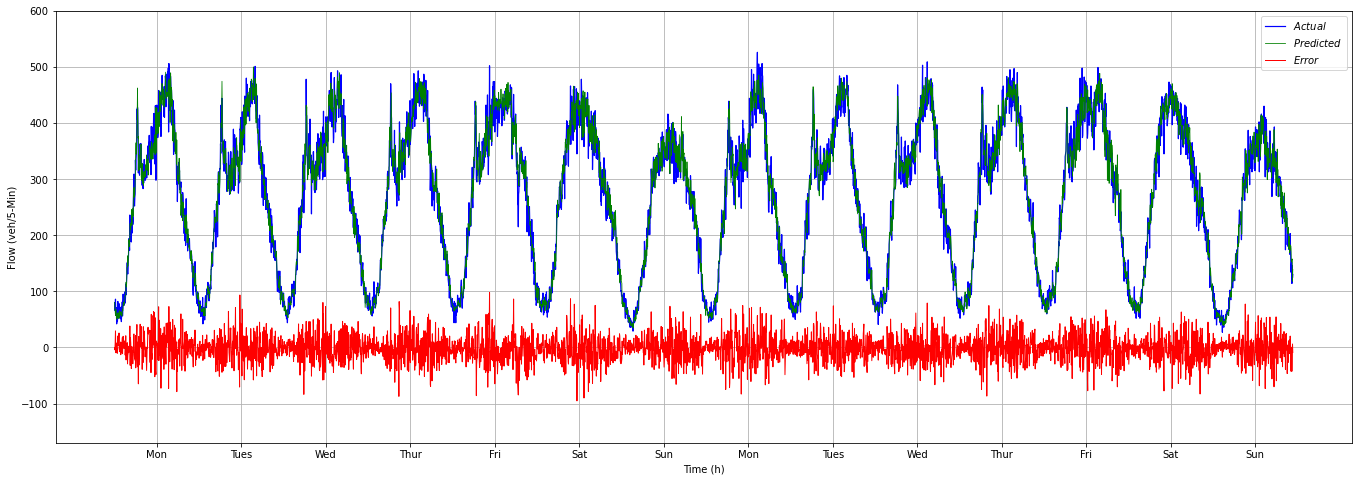

In [44]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(18,6))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(yv5, lw=1.2, label=r'$Actual$', color='blue')
axes.plot(test_predictions5, lw=0.8, label=r'$Predicted$', color='green')
axes.plot((yv5-test_predictions5), lw=1, label=r'$Error$', color='red')

#axes.set_xlim(0,24)
axes.set_ylim(-170,600)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([144 + i for i in range(0, 4032, 288)])
axes.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']*2)

plt.show()

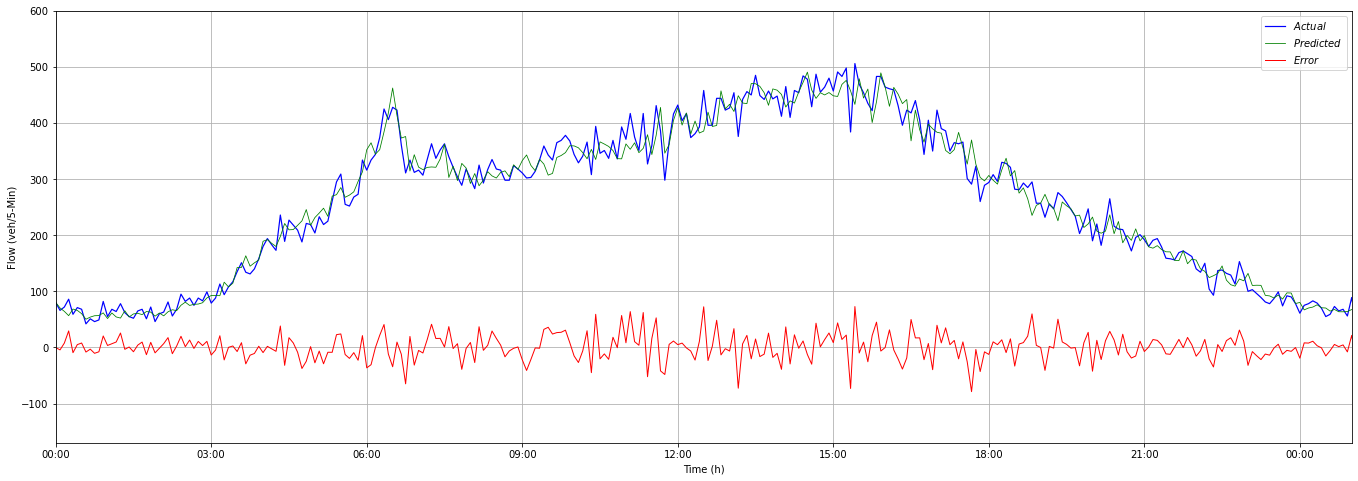

In [45]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(18,6))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(yv5, lw=1.2, label=r'$Actual$', color='blue')
axes.plot(test_predictions5, lw=0.8, label=r'$Predicted$', color='green')
axes.plot((yv5-test_predictions5), lw=1, label=r'$Error$', color='red')

axes.set_xlim(0,300)
axes.set_ylim(-170,600)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.show()

# 15 mins ahead

In [46]:
def build_model_15(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wide_train_15.shape[1:], name="WideInput")
    channel_Deep = keras.layers.Input(shape=(None, n_steps, n_features, n_channels), name="DeepInput")
    
    # Wide Model
    Wide_15 = keras.layers.Dense(
        units=hp.Int("units_NN", min_value=10, max_value=100, step=1), activation="relu"
    )(channel_Wide)
    
    # Deep Model
    # CNN 
    CNN_15 = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    flatten_15 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_15)
    # LSTM          
    LSTM_15 = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu')(flatten_15)
    
    # Concatenation 
    concat = keras.layers.concatenate([Wide_15, LSTM_15])
    
    # Output
    output = keras.layers.Dense(1, name= "output")(concat)
    
    # Model
    model_15 = keras.Model(inputs=[channel_Wide,channel_Deep], outputs=[output])

    # Compile
    model_15.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss='mse',metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_15

In [47]:
tuner15 = RandomSearch(
    build_model_15,
    objective="val_loss",
    max_trials=60,
    executions_per_trial=5,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="7d-CNN-LSTM-15",
)

INFO:tensorflow:Reloading Oracle from existing project C:\Runs\7d-CNN-LSTM-15\oracle.json
INFO:tensorflow:Reloading Tuner from C:\Runs\7d-CNN-LSTM-15\tuner0.json


In [48]:
tuner15.search_space_summary()

Search space summary
Default search space size: 5
units_NN (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [49]:
tuner15.search((Wt15,Xt15), yt15, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop], 
            verbose=2)

INFO:tensorflow:Oracle triggered exit


In [50]:
tuner15.results_summary(1)

Results summary
Results in C:\Runs\7d-CNN-LSTM-15
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units_NN: 62
filters: 192
kernel_size: 3
units_LSTM: 87
learning_rate: 0.0001
Score: 0.0020540927071124315


### Best model

In [51]:
best_hp15 = tuner15.get_best_hyperparameters()[0]
model15 = tuner15.hypermodel.build(best_hp15)

In [52]:
scaler_filename = "Best_HP/7d-ConvLSTM-15"
joblib.dump(best_hp15, scaler_filename) 

['Best_HP/7d-ConvLSTM-15']

In [53]:
model15.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
DeepInput (InputLayer)          [(None, None, 5, 7,  0                                            
__________________________________________________________________________________________________
time_distributed (TimeDistribut (None, None, 3, 5, 1 1920        DeepInput[0][0]                  
__________________________________________________________________________________________________
WideInput (InputLayer)          [(None, 14)]         0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, None, 2880)   0           time_distributed[0][0]           
_______________________________________________________________________________________

In [54]:
# model15.fit((Wt15,Xt15), yt15, 
#            epochs = 200, 
#            callbacks = [stop],
#            verbose = 1)

In [55]:
# model15.save("my_dir/7d-CNN-LSTM-15")

In [56]:
# metrics15 = pd.DataFrame(model15.history.history)

In [57]:
# metrics15[['loss']].plot()

In [58]:
MSE15  = []
MAE15  = []
RMSE15 = []
MAPE15 = []

for i in range(100):
    print(f"run: {i+1}")
    model15.fit((Wt15,Xt15), yt15, 
            epochs = 200, validation_split = val_percent,
            callbacks = [stop],
            verbose = 1)
    
    test_predictions15 = model15.predict((Wv15,Xv15))

    yv15 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
    yv15 = yv15[17:,4]

    df = Test.drop(Test.head(17).index)
    df.reset_index(inplace = True)
    df = df.drop(columns=['index','Timestamp'])
    df['f5'] = pd.Series(test_predictions15.flatten())

    test_predictions15 = scaler.inverse_transform(df)

    test_predictions15 = test_predictions15[:,4]

    MSE15.append(mean_squared_error(yv15,test_predictions15))

    MAE15.append(mean_absolute_error(yv15,test_predictions15))

    RMSE15.append(np.sqrt(mean_squared_error(yv15,test_predictions15)))

    MAPE15.append(mean_absolute_percentage_error(yv15,test_predictions15)*100)
    

    current_mse = mean_squared_error(yv15,test_predictions15)
    if all(i > current_mse for i in MSE15):
        model15.save("my_dir/7d-CNN-LSTM-15")

eval15 = [mean(MSE15), mean(MAE15), mean(RMSE15), mean(MAPE15)]
std15 = [stdev(MSE15), stdev(MAE15), stdev(RMSE15), stdev(MAPE15)]
print(eval15)

run: 1
Epoch 1/200
846/846 [==============================] - 23s 27ms/step - loss: 0.0113 - mean_absolute_error: 0.0647 - root_mean_squared_error: 0.1062 - mean_absolute_percentage_error: 4432.5889 - val_loss: 0.0027 - val_mean_absolute_error: 0.0392 - val_root_mean_squared_error: 0.0520 - val_mean_absolute_percentage_error: 11.8986
Epoch 2/200
846/846 [==============================] - 23s 27ms/step - loss: 0.0027 - mean_absolute_error: 0.0383 - root_mean_squared_error: 0.0519 - mean_absolute_percentage_error: 3219.1433 - val_loss: 0.0024 - val_mean_absolute_error: 0.0364 - val_root_mean_squared_error: 0.0485 - val_mean_absolute_percentage_error: 11.0616
Epoch 3/200
846/846 [==============================] - 23s 28ms/step - loss: 0.0024 - mean_absolute_error: 0.0366 - root_mean_squared_error: 0.0494 - mean_absolute_percentage_error: 3014.8564 - val_loss: 0.0026 - val_mean_absolute_error: 0.0381 - val_root_mean_squared_error: 0.0507 - val_mean_absolute_percentage_error: 11.6477
Epoch 

846/846 [==============================] - 23s 27ms/step - loss: 0.0021 - mean_absolute_error: 0.0336 - root_mean_squared_error: 0.0454 - mean_absolute_percentage_error: 3091.8457 - val_loss: 0.0021 - val_mean_absolute_error: 0.0342 - val_root_mean_squared_error: 0.0454 - val_mean_absolute_percentage_error: 10.2405
Epoch 4/200
846/846 [==============================] - 22s 26ms/step - loss: 0.0020 - mean_absolute_error: 0.0336 - root_mean_squared_error: 0.0453 - mean_absolute_percentage_error: 2579.6047 - val_loss: 0.0021 - val_mean_absolute_error: 0.0345 - val_root_mean_squared_error: 0.0458 - val_mean_absolute_percentage_error: 10.2561
Epoch 5/200
846/846 [==============================] - 23s 27ms/step - loss: 0.0020 - mean_absolute_error: 0.0336 - root_mean_squared_error: 0.0452 - mean_absolute_percentage_error: 3102.7549 - val_loss: 0.0021 - val_mean_absolute_error: 0.0348 - val_root_mean_squared_error: 0.0463 - val_mean_absolute_percentage_error: 10.6272ar
Epoch 6/200
846/846 [==

846/846 [==============================] - 23s 27ms/step - loss: 0.0020 - mean_absolute_error: 0.0330 - root_mean_squared_error: 0.0444 - mean_absolute_percentage_error: 2637.2253 - val_loss: 0.0021 - val_mean_absolute_error: 0.0343 - val_root_mean_squared_error: 0.0457 - val_mean_absolute_percentage_error: 10.4027
Epoch 8/200
846/846 [==============================] - 22s 26ms/step - loss: 0.0020 - mean_absolute_error: 0.0331 - root_mean_squared_error: 0.0444 - mean_absolute_percentage_error: 2776.5969 - val_loss: 0.0022 - val_mean_absolute_error: 0.0350 - val_root_mean_squared_error: 0.0467 - val_mean_absolute_percentage_error: 10.3261
Epoch 9/200
846/846 [==============================] - 23s 27ms/step - loss: 0.0020 - mean_absolute_error: 0.0330 - root_mean_squared_error: 0.0444 - mean_absolute_percentage_error: 3094.2664 - val_loss: 0.0022 - val_mean_absolute_error: 0.0348 - val_root_mean_squared_error: 0.0464 - val_mean_absolute_percentage_error: 10.6272
Epoch 10/200
846/846 [===

846/846 [==============================] - 22s 26ms/step - loss: 0.0019 - mean_absolute_error: 0.0324 - root_mean_squared_error: 0.0434 - mean_absolute_percentage_error: 2476.1914 - val_loss: 0.0021 - val_mean_absolute_error: 0.0346 - val_root_mean_squared_error: 0.0463 - val_mean_absolute_percentage_error: 10.4101
Epoch 4/200
846/846 [==============================] - 23s 27ms/step - loss: 0.0019 - mean_absolute_error: 0.0322 - root_mean_squared_error: 0.0433 - mean_absolute_percentage_error: 3111.9668 - val_loss: 0.0022 - val_mean_absolute_error: 0.0347 - val_root_mean_squared_error: 0.0465 - val_mean_absolute_percentage_error: 10.3770
Epoch 5/200
846/846 [==============================] - 23s 27ms/step - loss: 0.0019 - mean_absolute_error: 0.0324 - root_mean_squared_error: 0.0434 - mean_absolute_percentage_error: 3011.2795 - val_loss: 0.0021 - val_mean_absolute_error: 0.0345 - val_root_mean_squared_error: 0.0461 - val_mean_absolute_percentage_error: 10.3378
Epoch 6/200
846/846 [====

Epoch 2/200
846/846 [==============================] - 23s 27ms/step - loss: 0.0019 - mean_absolute_error: 0.0321 - root_mean_squared_error: 0.0430 - mean_absolute_percentage_error: 2677.8752 - val_loss: 0.0021 - val_mean_absolute_error: 0.0345 - val_root_mean_squared_error: 0.0461 - val_mean_absolute_percentage_error: 10.2837
Epoch 3/200
846/846 [==============================] - 22s 26ms/step - loss: 0.0018 - mean_absolute_error: 0.0321 - root_mean_squared_error: 0.0430 - mean_absolute_percentage_error: 2969.6038 - val_loss: 0.0021 - val_mean_absolute_error: 0.0346 - val_root_mean_squared_error: 0.0462 - val_mean_absolute_percentage_error: 10.2589
Epoch 4/200
846/846 [==============================] - 23s 27ms/step - loss: 0.0018 - mean_absolute_error: 0.0320 - root_mean_squared_error: 0.0429 - mean_absolute_percentage_error: 2636.5098 - val_loss: 0.0021 - val_mean_absolute_error: 0.0346 - val_root_mean_squared_error: 0.0463 - val_mean_absolute_percentage_error: 10.5297
Epoch 5/200
8

846/846 [==============================] - 23s 28ms/step - loss: 0.0018 - mean_absolute_error: 0.0316 - root_mean_squared_error: 0.0423 - mean_absolute_percentage_error: 3110.5667 - val_loss: 0.0023 - val_mean_absolute_error: 0.0357 - val_root_mean_squared_error: 0.0480 - val_mean_absolute_percentage_error: 10.7747
Epoch 5/200
846/846 [==============================] - 22s 26ms/step - loss: 0.0018 - mean_absolute_error: 0.0316 - root_mean_squared_error: 0.0423 - mean_absolute_percentage_error: 2522.3394 - val_loss: 0.0022 - val_mean_absolute_error: 0.0352 - val_root_mean_squared_error: 0.0470 - val_mean_absolute_percentage_error: 10.4248
Epoch 6/200
846/846 [==============================] - 23s 27ms/step - loss: 0.0018 - mean_absolute_error: 0.0314 - root_mean_squared_error: 0.0421 - mean_absolute_percentage_error: 2994.7021 - val_loss: 0.0022 - val_mean_absolute_error: 0.0351 - val_root_mean_squared_error: 0.0471 - val_mean_absolute_percentage_error: 10.4079
run: 22
Epoch 1/200
846/8

run: 26
Epoch 1/200
846/846 [==============================] - 23s 28ms/step - loss: 0.0017 - mean_absolute_error: 0.0309 - root_mean_squared_error: 0.0414 - mean_absolute_percentage_error: 2705.5833 - val_loss: 0.0022 - val_mean_absolute_error: 0.0354 - val_root_mean_squared_error: 0.0474 - val_mean_absolute_percentage_error: 10.4688
Epoch 2/200
846/846 [==============================] - 23s 27ms/step - loss: 0.0017 - mean_absolute_error: 0.0308 - root_mean_squared_error: 0.0412 - mean_absolute_percentage_error: 2339.1467 - val_loss: 0.0023 - val_mean_absolute_error: 0.0360 - val_root_mean_squared_error: 0.0484 - val_mean_absolute_percentage_error: 10.7924lute
Epoch 3/200
846/846 [==============================] - 23s 28ms/step - loss: 0.0017 - mean_absolute_error: 0.0309 - root_mean_squared_error: 0.0413 - mean_absolute_percentage_error: 2637.8713 - val_loss: 0.0023 - val_mean_absolute_error: 0.0354 - val_root_mean_squared_error: 0.0476 - val_mean_absolute_percentage_error: 10.5196
E

846/846 [==============================] - 23s 27ms/step - loss: 0.0016 - mean_absolute_error: 0.0301 - root_mean_squared_error: 0.0402 - mean_absolute_percentage_error: 2219.3967 - val_loss: 0.0023 - val_mean_absolute_error: 0.0358 - val_root_mean_squared_error: 0.0480 - val_mean_absolute_percentage_error: 10.7276
Epoch 5/200
846/846 [==============================] - 23s 27ms/step - loss: 0.0016 - mean_absolute_error: 0.0301 - root_mean_squared_error: 0.0402 - mean_absolute_percentage_error: 2989.3633 - val_loss: 0.0024 - val_mean_absolute_error: 0.0366 - val_root_mean_squared_error: 0.0486 - val_mean_absolute_percentage_error: 10.6690
Epoch 6/200
846/846 [==============================] - 23s 28ms/step - loss: 0.0016 - mean_absolute_error: 0.0301 - root_mean_squared_error: 0.0402 - mean_absolute_percentage_error: 2700.7742 - val_loss: 0.0023 - val_mean_absolute_error: 0.0357 - val_root_mean_squared_error: 0.0478 - val_mean_absolute_percentage_error: 10.5606
run: 32
Epoch 1/200
846/8

Epoch 10/200
846/846 [==============================] - 23s 27ms/step - loss: 0.0015 - mean_absolute_error: 0.0292 - root_mean_squared_error: 0.0390 - mean_absolute_percentage_error: 2572.7861 - val_loss: 0.0024 - val_mean_absolute_error: 0.0366 - val_root_mean_squared_error: 0.0490 - val_mean_absolute_percentage_error: 10.8461
Epoch 11/200
846/846 [==============================] - 23s 27ms/step - loss: 0.0015 - mean_absolute_error: 0.0290 - root_mean_squared_error: 0.0388 - mean_absolute_percentage_error: 2579.3987 - val_loss: 0.0024 - val_mean_absolute_error: 0.0369 - val_root_mean_squared_error: 0.0491 - val_mean_absolute_percentage_error: 10.7464
Epoch 12/200
846/846 [==============================] - 22s 26ms/step - loss: 0.0015 - mean_absolute_error: 0.0291 - root_mean_squared_error: 0.0388 - mean_absolute_percentage_error: 2916.7559 - val_loss: 0.0024 - val_mean_absolute_error: 0.0367 - val_root_mean_squared_error: 0.0489 - val_mean_absolute_percentage_error: 10.6977
Epoch 13/2

846/846 [==============================] - 23s 27ms/step - loss: 0.0014 - mean_absolute_error: 0.0282 - root_mean_squared_error: 0.0375 - mean_absolute_percentage_error: 2896.4473 - val_loss: 0.0025 - val_mean_absolute_error: 0.0378 - val_root_mean_squared_error: 0.0503 - val_mean_absolute_percentage_error: 11.0149
Epoch 2/200
846/846 [==============================] - 23s 27ms/step - loss: 0.0014 - mean_absolute_error: 0.0280 - root_mean_squared_error: 0.0373 - mean_absolute_percentage_error: 2471.8862 - val_loss: 0.0024 - val_mean_absolute_error: 0.0369 - val_root_mean_squared_error: 0.0495 - val_mean_absolute_percentage_error: 11.0130
Epoch 3/200
846/846 [==============================] - 23s 27ms/step - loss: 0.0014 - mean_absolute_error: 0.0280 - root_mean_squared_error: 0.0372 - mean_absolute_percentage_error: 2602.0242 - val_loss: 0.0025 - val_mean_absolute_error: 0.0371 - val_root_mean_squared_error: 0.0496 - val_mean_absolute_percentage_error: 11.1252
Epoch 4/200
846/846 [====

Epoch 13/200
846/846 [==============================] - 23s 28ms/step - loss: 0.0012 - mean_absolute_error: 0.0266 - root_mean_squared_error: 0.0353 - mean_absolute_percentage_error: 2556.2075 - val_loss: 0.0028 - val_mean_absolute_error: 0.0401 - val_root_mean_squared_error: 0.0531 - val_mean_absolute_percentage_error: 11.3702
run: 46
Epoch 1/200
846/846 [==============================] - 22s 26ms/step - loss: 0.0013 - mean_absolute_error: 0.0267 - root_mean_squared_error: 0.0355 - mean_absolute_percentage_error: 2718.1421 - val_loss: 0.0026 - val_mean_absolute_error: 0.0382 - val_root_mean_squared_error: 0.0511 - val_mean_absolute_percentage_error: 11.1379
Epoch 2/200
846/846 [==============================] - 23s 27ms/step - loss: 0.0013 - mean_absolute_error: 0.0267 - root_mean_squared_error: 0.0354 - mean_absolute_percentage_error: 2609.6545 - val_loss: 0.0026 - val_mean_absolute_error: 0.0382 - val_root_mean_squared_error: 0.0511 - val_mean_absolute_percentage_error: 11.2492
Epoc

846/846 [==============================] - 24s 28ms/step - loss: 0.0011 - mean_absolute_error: 0.0254 - root_mean_squared_error: 0.0337 - mean_absolute_percentage_error: 2356.9873 - val_loss: 0.0027 - val_mean_absolute_error: 0.0391 - val_root_mean_squared_error: 0.0522 - val_mean_absolute_percentage_error: 11.3307
run: 52
Epoch 1/200
846/846 [==============================] - 24s 28ms/step - loss: 0.0012 - mean_absolute_error: 0.0257 - root_mean_squared_error: 0.0340 - mean_absolute_percentage_error: 2468.8218 - val_loss: 0.0026 - val_mean_absolute_error: 0.0383 - val_root_mean_squared_error: 0.0511 - val_mean_absolute_percentage_error: 11.2664
Epoch 2/200
846/846 [==============================] - 23s 28ms/step - loss: 0.0012 - mean_absolute_error: 0.0257 - root_mean_squared_error: 0.0341 - mean_absolute_percentage_error: 1973.4106 - val_loss: 0.0027 - val_mean_absolute_error: 0.0387 - val_root_mean_squared_error: 0.0516 - val_mean_absolute_percentage_error: 11.3052
Epoch 3/200
846/8

846/846 [==============================] - 23s 27ms/step - loss: 0.0010 - mean_absolute_error: 0.0245 - root_mean_squared_error: 0.0323 - mean_absolute_percentage_error: 2405.5667 - val_loss: 0.0028 - val_mean_absolute_error: 0.0398 - val_root_mean_squared_error: 0.0529 - val_mean_absolute_percentage_error: 11.5651
Epoch 5/200
846/846 [==============================] - 23s 27ms/step - loss: 0.0010 - mean_absolute_error: 0.0243 - root_mean_squared_error: 0.0322 - mean_absolute_percentage_error: 2340.9680 - val_loss: 0.0029 - val_mean_absolute_error: 0.0398 - val_root_mean_squared_error: 0.0535 - val_mean_absolute_percentage_error: 11.7590
Epoch 6/200
846/846 [==============================] - 22s 26ms/step - loss: 0.0010 - mean_absolute_error: 0.0242 - root_mean_squared_error: 0.0321 - mean_absolute_percentage_error: 2319.0781 - val_loss: 0.0028 - val_mean_absolute_error: 0.0398 - val_root_mean_squared_error: 0.0529 - val_mean_absolute_percentage_error: 11.4956
run: 58
Epoch 1/200
846/8

846/846 [==============================] - 23s 27ms/step - loss: 9.5681e-04 - mean_absolute_error: 0.0234 - root_mean_squared_error: 0.0309 - mean_absolute_percentage_error: 2577.7361 - val_loss: 0.0029 - val_mean_absolute_error: 0.0406 - val_root_mean_squared_error: 0.0541 - val_mean_absolute_percentage_error: 11.7110
Epoch 6/200
846/846 [==============================] - 23s 27ms/step - loss: 9.6171e-04 - mean_absolute_error: 0.0235 - root_mean_squared_error: 0.0310 - mean_absolute_percentage_error: 2532.9985 - val_loss: 0.0029 - val_mean_absolute_error: 0.0404 - val_root_mean_squared_error: 0.0541 - val_mean_absolute_percentage_error: 11.7741
Epoch 7/200
846/846 [==============================] - 22s 26ms/step - loss: 9.5120e-04 - mean_absolute_error: 0.0234 - root_mean_squared_error: 0.0308 - mean_absolute_percentage_error: 2007.9879 - val_loss: 0.0029 - val_mean_absolute_error: 0.0400 - val_root_mean_squared_error: 0.0535 - val_mean_absolute_percentage_error: 11.6705
Epoch 8/200
8

Epoch 2/200
846/846 [==============================] - 23s 27ms/step - loss: 8.6279e-04 - mean_absolute_error: 0.0223 - root_mean_squared_error: 0.0294 - mean_absolute_percentage_error: 2405.7512 - val_loss: 0.0030 - val_mean_absolute_error: 0.0410 - val_root_mean_squared_error: 0.0547 - val_mean_absolute_percentage_error: 11.8900
Epoch 3/200
846/846 [==============================] - 22s 26ms/step - loss: 8.6981e-04 - mean_absolute_error: 0.0224 - root_mean_squared_error: 0.0295 - mean_absolute_percentage_error: 2352.1433 - val_loss: 0.0030 - val_mean_absolute_error: 0.0409 - val_root_mean_squared_error: 0.0547 - val_mean_absolute_percentage_error: 11.9764
Epoch 4/200
846/846 [==============================] - 23s 27ms/step - loss: 8.4606e-04 - mean_absolute_error: 0.0220 - root_mean_squared_error: 0.0291 - mean_absolute_percentage_error: 2244.0586 - val_loss: 0.0030 - val_mean_absolute_error: 0.0412 - val_root_mean_squared_error: 0.0547 - val_mean_absolute_percentage_error: 11.8140
E

Epoch 3/200
846/846 [==============================] - 22s 26ms/step - loss: 7.4273e-04 - mean_absolute_error: 0.0207 - root_mean_squared_error: 0.0273 - mean_absolute_percentage_error: 2519.9453 - val_loss: 0.0032 - val_mean_absolute_error: 0.0422 - val_root_mean_squared_error: 0.0564 - val_mean_absolute_percentage_error: 12.1503
Epoch 4/200
846/846 [==============================] - 23s 27ms/step - loss: 7.2251e-04 - mean_absolute_error: 0.0204 - root_mean_squared_error: 0.0269 - mean_absolute_percentage_error: 2555.6768 - val_loss: 0.0031 - val_mean_absolute_error: 0.0421 - val_root_mean_squared_error: 0.0561 - val_mean_absolute_percentage_error: 12.1009
Epoch 5/200
846/846 [==============================] - 23s 27ms/step - loss: 7.4057e-04 - mean_absolute_error: 0.0207 - root_mean_squared_error: 0.0272 - mean_absolute_percentage_error: 2415.7000 - val_loss: 0.0031 - val_mean_absolute_error: 0.0418 - val_root_mean_squared_error: 0.0555 - val_mean_absolute_percentage_error: 12.0038
E

846/846 [==============================] - 22s 26ms/step - loss: 6.4923e-04 - mean_absolute_error: 0.0194 - root_mean_squared_error: 0.0255 - mean_absolute_percentage_error: 2307.5007 - val_loss: 0.0033 - val_mean_absolute_error: 0.0432 - val_root_mean_squared_error: 0.0577 - val_mean_absolute_percentage_error: 12.4271e-04 - mean_absolute_error: 0.0194 - 
Epoch 14/200
846/846 [==============================] - 23s 27ms/step - loss: 6.4334e-04 - mean_absolute_error: 0.0193 - root_mean_squared_error: 0.0254 - mean_absolute_percentage_error: 2372.3816 - val_loss: 0.0032 - val_mean_absolute_error: 0.0423 - val_root_mean_squared_error: 0.0568 - val_mean_absolute_percentage_error: 12.1769
Epoch 15/200
846/846 [==============================] - 23s 27ms/step - loss: 6.4276e-04 - mean_absolute_error: 0.0193 - root_mean_squared_error: 0.0254 - mean_absolute_percentage_error: 2400.5950 - val_loss: 0.0032 - val_mean_absolute_error: 0.0423 - val_root_mean_squared_error: 0.0567 - val_mean_absolute_

846/846 [==============================] - 23s 27ms/step - loss: 5.8908e-04 - mean_absolute_error: 0.0185 - root_mean_squared_error: 0.0243 - mean_absolute_percentage_error: 2394.7090 - val_loss: 0.0033 - val_mean_absolute_error: 0.0429 - val_root_mean_squared_error: 0.0574 - val_mean_absolute_percentage_error: 12.3692
Epoch 2/200
846/846 [==============================] - 23s 27ms/step - loss: 5.8169e-04 - mean_absolute_error: 0.0184 - root_mean_squared_error: 0.0241 - mean_absolute_percentage_error: 2128.2751 - val_loss: 0.0034 - val_mean_absolute_error: 0.0434 - val_root_mean_squared_error: 0.0580 - val_mean_absolute_percentage_error: 12.4561
Epoch 3/200
846/846 [==============================] - 23s 27ms/step - loss: 5.7800e-04 - mean_absolute_error: 0.0184 - root_mean_squared_error: 0.0240 - mean_absolute_percentage_error: 2219.2422 - val_loss: 0.0034 - val_mean_absolute_error: 0.0436 - val_root_mean_squared_error: 0.0584 - val_mean_absolute_percentage_error: 12.6211
Epoch 4/200
8

846/846 [==============================] - 22s 26ms/step - loss: 5.0227e-04 - mean_absolute_error: 0.0172 - root_mean_squared_error: 0.0224 - mean_absolute_percentage_error: 2427.1978 - val_loss: 0.0035 - val_mean_absolute_error: 0.0444 - val_root_mean_squared_error: 0.0591 - val_mean_absolute_percentage_error: 12.6467
Epoch 6/200
846/846 [==============================] - 22s 27ms/step - loss: 5.0166e-04 - mean_absolute_error: 0.0171 - root_mean_squared_error: 0.0224 - mean_absolute_percentage_error: 2385.6851 - val_loss: 0.0035 - val_mean_absolute_error: 0.0439 - val_root_mean_squared_error: 0.0588 - val_mean_absolute_percentage_error: 12.7297
run: 89
Epoch 1/200
846/846 [==============================] - 23s 27ms/step - loss: 5.1113e-04 - mean_absolute_error: 0.0173 - root_mean_squared_error: 0.0226 - mean_absolute_percentage_error: 1988.0756 - val_loss: 0.0034 - val_mean_absolute_error: 0.0440 - val_root_mean_squared_error: 0.0587 - val_mean_absolute_percentage_error: 12.6388
Epoch

846/846 [==============================] - 27s 32ms/step - loss: 4.5626e-04 - mean_absolute_error: 0.0164 - root_mean_squared_error: 0.0214 - mean_absolute_percentage_error: 2321.4434 - val_loss: 0.0036 - val_mean_absolute_error: 0.0447 - val_root_mean_squared_error: 0.0597 - val_mean_absolute_percentage_error: 12.6738
Epoch 4/200
846/846 [==============================] - 27s 32ms/step - loss: 4.6801e-04 - mean_absolute_error: 0.0166 - root_mean_squared_error: 0.0216 - mean_absolute_percentage_error: 2271.3323 - val_loss: 0.0036 - val_mean_absolute_error: 0.0448 - val_root_mean_squared_error: 0.0597 - val_mean_absolute_percentage_error: 12.7685
Epoch 5/200
846/846 [==============================] - 26s 31ms/step - loss: 4.5556e-04 - mean_absolute_error: 0.0164 - root_mean_squared_error: 0.0213 - mean_absolute_percentage_error: 2166.0037 - val_loss: 0.0037 - val_mean_absolute_error: 0.0451 - val_root_mean_squared_error: 0.0607 - val_mean_absolute_percentage_error: 13.1247
Epoch 6/200
8

846/846 [==============================] - 25s 30ms/step - loss: 4.1220e-04 - mean_absolute_error: 0.0156 - root_mean_squared_error: 0.0203 - mean_absolute_percentage_error: 2120.2236 - val_loss: 0.0036 - val_mean_absolute_error: 0.0451 - val_root_mean_squared_error: 0.0604 - val_mean_absolute_percentage_error: 12.8971mea
Epoch 9/200
846/846 [==============================] - 26s 30ms/step - loss: 3.9938e-04 - mean_absolute_error: 0.0154 - root_mean_squared_error: 0.0200 - mean_absolute_percentage_error: 2377.0439 - val_loss: 0.0036 - val_mean_absolute_error: 0.0448 - val_root_mean_squared_error: 0.0601 - val_mean_absolute_percentage_error: 12.7749
Epoch 10/200
846/846 [==============================] - 24s 28ms/step - loss: 3.9481e-04 - mean_absolute_error: 0.0152 - root_mean_squared_error: 0.0199 - mean_absolute_percentage_error: 2229.8032 - val_loss: 0.0036 - val_mean_absolute_error: 0.0447 - val_root_mean_squared_error: 0.0599 - val_mean_absolute_percentage_error: 12.7853
Epoch 11/

In [59]:
model15 = keras.models.load_model("my_dir/7d-CNN-LSTM-15")

In [110]:
runs = {'MSE': MSE15, 'MAE': MAE15, 'RMSE': RMSE15, 'MAPE': MAPE15}
table15 = pd.DataFrame(data=runs)
table15.to_csv("Results/Runs/7d-CNN-LSTM-15")

In [111]:
pd.read_csv("Results/Runs/7d-CNN-LSTM-15", index_col=0)

,MSE,MAE,RMSE,MAPE
0,638.138592,19.636828,25.261405,9.053914
1,635.616099,19.455115,25.211428,8.766196
2,625.282814,19.297185,25.005656,8.596454
3,623.817404,19.272755,24.976337,8.523883
4,631.267780,19.452917,25.125043,8.782228
...,...,...,...,...
95,1030.920031,24.359309,32.107943,10.534164
96,1040.415186,24.564628,32.255468,10.562142
97,1049.694691,24.541676,32.398992,10.430103
98,1044.839296,24.483375,32.323974,10.395895


### Evaluation on inverse_transform

In [60]:
test_predictions15 = model15.predict((Wv15,Xv15))

yv15 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
yv15 = yv15[17:,4]

df = Test.drop(Test.head(17).index)
df.reset_index(inplace = True)
df = df.drop(columns=['index','Timestamp'])
df['f5'] = pd.Series(test_predictions15.flatten())

test_predictions15 = scaler.inverse_transform(df)

test_predictions15 = test_predictions15[:,4]

#MSE15 = mean_squared_error(yv15,test_predictions15)

#MAE15 = mean_absolute_error(yv15,test_predictions15)

#RMSE15 = np.sqrt(MSE15)

#MAPE15 = mean_absolute_percentage_error(yv15,test_predictions15)*100

#eval15 = [MSE15, MAE15, RMSE15, MAPE15]
#print(eval15)

In [61]:
RA10 = ra.RA_10(np.asarray(yv15), np.asarray(test_predictions15))
RA15 = ra.RA_15(np.asarray(yv15), np.asarray(test_predictions15))
RA20 = ra.RA_20(np.asarray(yv15), np.asarray(test_predictions15))

res15 = [RA10, RA15, RA20]
print(res15)

[65.97758405977584, 82.61519302615193, 91.73100871731009]


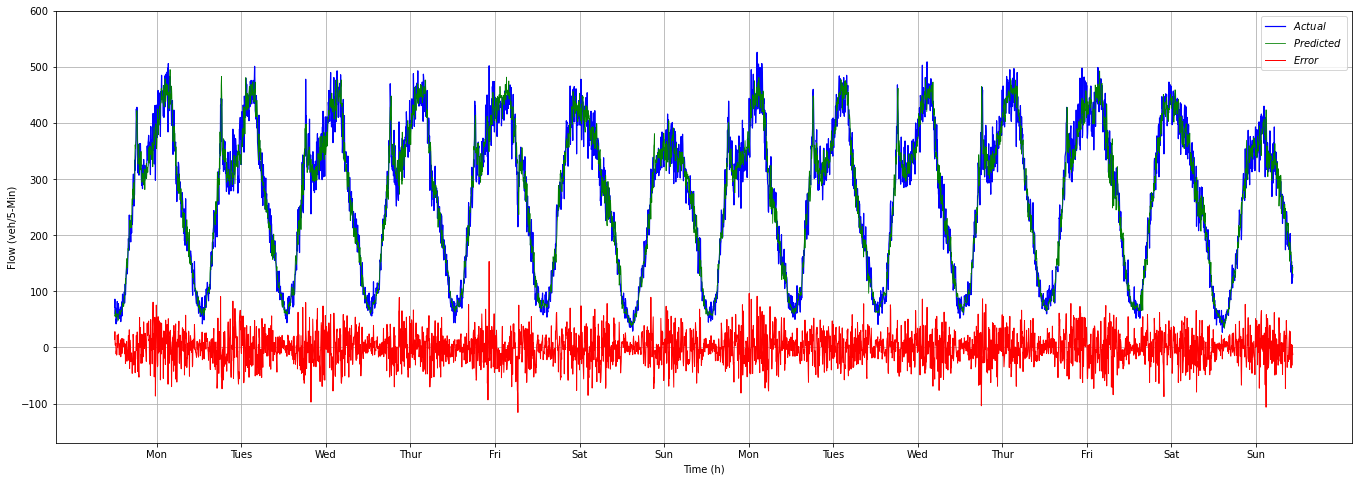

In [62]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(18,6))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(yv15, lw=1.2, label=r'$Actual$', color='blue')
axes.plot(test_predictions15, lw=0.8, label=r'$Predicted$', color='green')
axes.plot((yv15-test_predictions15), lw=1, label=r'$Error$', color='red')

#axes.set_xlim(0,24)
axes.set_ylim(-170,600)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([144 + i for i in range(0, 4032, 288)])
axes.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']*2)

plt.show()

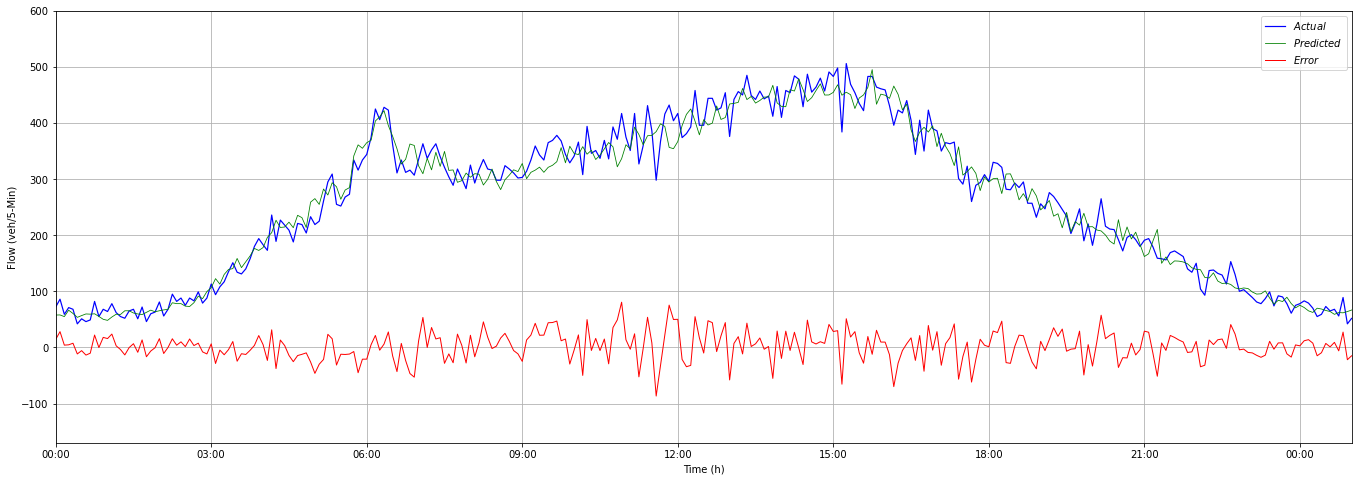

In [63]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(18,6))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(yv15, lw=1.2, label=r'$Actual$', color='blue')
axes.plot(test_predictions15, lw=0.8, label=r'$Predicted$', color='green')
axes.plot((yv15-test_predictions15), lw=1, label=r'$Error$', color='red')

axes.set_xlim(0,300)
axes.set_ylim(-170,600)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.show()

# 30 mins ahead

In [64]:
def build_model_30(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wide_train_30.shape[1:], name="WideInput")
    channel_Deep = keras.layers.Input(shape=(None, n_steps, n_features, n_channels), name="DeepInput")
    
    # Wide Model
    Wide_30 = keras.layers.Dense(
        units=hp.Int("units_NN", min_value=10, max_value=100, step=1), activation="relu"
    )(channel_Wide)
    
    # Deep Model
    # CNN 
    CNN_30 = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    flatten_30 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_30)
    # LSTM          
    LSTM_30 = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu')(flatten_30)
    
    # Concatenation 
    concat = keras.layers.concatenate([Wide_30, LSTM_30])
    
    # Output
    output = keras.layers.Dense(1, name= "output")(concat)
    
    # Model
    model_30 = keras.Model(inputs=[channel_Wide,channel_Deep], outputs=[output])

    # Compile
    model_30.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss='mse',metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_30

In [65]:
tuner30 = RandomSearch(
    build_model_30,
    objective="val_loss",
    max_trials=60,
    executions_per_trial=5,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="7d-CNN-LSTM-30",
)

INFO:tensorflow:Reloading Oracle from existing project C:\Runs\7d-CNN-LSTM-30\oracle.json
INFO:tensorflow:Reloading Tuner from C:\Runs\7d-CNN-LSTM-30\tuner0.json


In [66]:
tuner30.search_space_summary()

Search space summary
Default search space size: 5
units_NN (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [67]:
tuner30.search((Wt30,Xt30), yt30, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop],
            verbose=2)

INFO:tensorflow:Oracle triggered exit


In [68]:
tuner30.results_summary(1)

Results summary
Results in C:\Runs\7d-CNN-LSTM-30
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units_NN: 75
filters: 384
kernel_size: 3
units_LSTM: 81
learning_rate: 0.0001
Score: 0.002177484566345811


### Best model

In [69]:
best_hp30 = tuner30.get_best_hyperparameters()[0]
model30 = tuner30.hypermodel.build(best_hp30)

In [70]:
scaler_filename = "7d-ConvLSTM-30"
joblib.dump(best_hp30, scaler_filename) 

['7d-ConvLSTM-30']

In [71]:
model30.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
DeepInput (InputLayer)          [(None, None, 5, 7,  0                                            
__________________________________________________________________________________________________
time_distributed (TimeDistribut (None, None, 3, 5, 3 3840        DeepInput[0][0]                  
__________________________________________________________________________________________________
WideInput (InputLayer)          [(None, 14)]         0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, None, 5760)   0           time_distributed[0][0]           
_______________________________________________________________________________________

In [72]:
#model30.fit((Wt30,Xt30), yt30, 
#            epochs = 200, 
#            callbacks = [stop],
#            verbose = 1)

In [73]:
#model30.save("my_dir/7d-CNN-LSTM-30")

In [74]:
#metrics30 = pd.DataFrame(model30.history.history)

In [75]:
#metrics30[['loss']].plot()

In [76]:
MSE30  = []
MAE30  = []
RMSE30 = []
MAPE30 = []

for i in range(100):
    print(f"run: {i+1}")
    model30.fit((Wt30,Xt30), yt30, 
            epochs = 200, validation_split = val_percent,
            callbacks = [stop],
            verbose = 1)
    
    test_predictions30 = model30.predict((Wv30,Xv30))

    yv30 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
    yv30 = yv30[20:,4]

    df = Test.drop(Test.head(20).index)
    df.reset_index(inplace = True)
    df = df.drop(columns=['index','Timestamp'])
    df['f5'] = pd.Series(test_predictions30.flatten())

    test_predictions30 = scaler.inverse_transform(df)

    test_predictions30 = test_predictions30[:,4]

    MSE30.append(mean_squared_error(yv30,test_predictions30))

    MAE30.append(mean_absolute_error(yv30,test_predictions30))

    RMSE30.append(np.sqrt(mean_squared_error(yv30,test_predictions30)))

    MAPE30.append(mean_absolute_percentage_error(yv30,test_predictions30)*100)

    
    current_mse = mean_squared_error(yv30,test_predictions30)
    if all(i > current_mse for i in MSE30):
        model30.save("my_dir/7d-CNN-LSTM-30")

eval30 = [mean(MSE30), mean(MAE30), mean(RMSE30), mean(MAPE30)]
std30 = [stdev(MSE30), stdev(MAE30), stdev(RMSE30), stdev(MAPE30)]
print(eval30)

run: 1
Epoch 1/200
846/846 [==============================] - 32s 38ms/step - loss: 0.0035 - mean_absolute_error: 0.0423 - root_mean_squared_error: 0.0588 - mean_absolute_percentage_error: 3770.1968 - val_loss: 0.0027 - val_mean_absolute_error: 0.0386 - val_root_mean_squared_error: 0.0523 - val_mean_absolute_percentage_error: 11.6007
Epoch 2/200
846/846 [==============================] - 32s 37ms/step - loss: 0.0027 - mean_absolute_error: 0.0378 - root_mean_squared_error: 0.0519 - mean_absolute_percentage_error: 3181.4160 - val_loss: 0.0026 - val_mean_absolute_error: 0.0379 - val_root_mean_squared_error: 0.0512 - val_mean_absolute_percentage_error: 11.3074
Epoch 3/200
846/846 [==============================] - 33s 39ms/step - loss: 0.0026 - mean_absolute_error: 0.0372 - root_mean_squared_error: 0.0511 - mean_absolute_percentage_error: 3452.4915 - val_loss: 0.0025 - val_mean_absolute_error: 0.0374 - val_root_mean_squared_error: 0.0504 - val_mean_absolute_percentage_error: 11.1072371 - r

846/846 [==============================] - 33s 39ms/step - loss: 0.0022 - mean_absolute_error: 0.0345 - root_mean_squared_error: 0.0468 - mean_absolute_percentage_error: 3013.0085 - val_loss: 0.0022 - val_mean_absolute_error: 0.0355 - val_root_mean_squared_error: 0.0471 - val_mean_absolute_percentage_error: 10.5607
Epoch 5/200
846/846 [==============================] - 32s 38ms/step - loss: 0.0022 - mean_absolute_error: 0.0345 - root_mean_squared_error: 0.0468 - mean_absolute_percentage_error: 3257.1716 - val_loss: 0.0022 - val_mean_absolute_error: 0.0355 - val_root_mean_squared_error: 0.0472 - val_mean_absolute_percentage_error: 10.6782
Epoch 6/200
846/846 [==============================] - 33s 39ms/step - loss: 0.0022 - mean_absolute_error: 0.0344 - root_mean_squared_error: 0.0466 - mean_absolute_percentage_error: 2874.7834 - val_loss: 0.0022 - val_mean_absolute_error: 0.0353 - val_root_mean_squared_error: 0.0469 - val_mean_absolute_percentage_error: 10.4207
Epoch 7/200
846/846 [====

846/846 [==============================] - 33s 39ms/step - loss: 0.0022 - mean_absolute_error: 0.0344 - root_mean_squared_error: 0.0464 - mean_absolute_percentage_error: 3138.1963 - val_loss: 0.0021 - val_mean_absolute_error: 0.0349 - val_root_mean_squared_error: 0.0464 - val_mean_absolute_percentage_error: 10.4187
Epoch 7/200
846/846 [==============================] - 33s 40ms/step - loss: 0.0021 - mean_absolute_error: 0.0342 - root_mean_squared_error: 0.0463 - mean_absolute_percentage_error: 3738.5886 - val_loss: 0.0021 - val_mean_absolute_error: 0.0348 - val_root_mean_squared_error: 0.0463 - val_mean_absolute_percentage_error: 10.3523
Epoch 8/200
846/846 [==============================] - 31s 37ms/step - loss: 0.0021 - mean_absolute_error: 0.0342 - root_mean_squared_error: 0.0464 - mean_absolute_percentage_error: 3293.4641 - val_loss: 0.0021 - val_mean_absolute_error: 0.0348 - val_root_mean_squared_error: 0.0463 - val_mean_absolute_percentage_error: 10.5532
Epoch 9/200
846/846 [====

Epoch 7/200
846/846 [==============================] - 31s 37ms/step - loss: 0.0021 - mean_absolute_error: 0.0337 - root_mean_squared_error: 0.0455 - mean_absolute_percentage_error: 3143.0574 - val_loss: 0.0022 - val_mean_absolute_error: 0.0355 - val_root_mean_squared_error: 0.0472 - val_mean_absolute_percentage_error: 10.4181
Epoch 8/200
846/846 [==============================] - 33s 39ms/step - loss: 0.0021 - mean_absolute_error: 0.0338 - root_mean_squared_error: 0.0456 - mean_absolute_percentage_error: 3071.9512 - val_loss: 0.0022 - val_mean_absolute_error: 0.0354 - val_root_mean_squared_error: 0.0470 - val_mean_absolute_percentage_error: 10.4698
run: 9
Epoch 1/200
846/846 [==============================] - 33s 39ms/step - loss: 0.0021 - mean_absolute_error: 0.0339 - root_mean_squared_error: 0.0458 - mean_absolute_percentage_error: 3202.9722 - val_loss: 0.0022 - val_mean_absolute_error: 0.0351 - val_root_mean_squared_error: 0.0468 - val_mean_absolute_percentage_error: 10.5029
Epoch 

Epoch 2/200
846/846 [==============================] - 34s 40ms/step - loss: 0.0020 - mean_absolute_error: 0.0334 - root_mean_squared_error: 0.0450 - mean_absolute_percentage_error: 3263.7593 - val_loss: 0.0023 - val_mean_absolute_error: 0.0360 - val_root_mean_squared_error: 0.0478 - val_mean_absolute_percentage_error: 10.5255
Epoch 3/200
846/846 [==============================] - 33s 39ms/step - loss: 0.0020 - mean_absolute_error: 0.0333 - root_mean_squared_error: 0.0449 - mean_absolute_percentage_error: 3306.4377 - val_loss: 0.0022 - val_mean_absolute_error: 0.0351 - val_root_mean_squared_error: 0.0467 - val_mean_absolute_percentage_error: 10.4227
Epoch 4/200
846/846 [==============================] - 33s 39ms/step - loss: 0.0020 - mean_absolute_error: 0.0333 - root_mean_squared_error: 0.0449 - mean_absolute_percentage_error: 3037.9802 - val_loss: 0.0022 - val_mean_absolute_error: 0.0355 - val_root_mean_squared_error: 0.0473 - val_mean_absolute_percentage_error: 10.4406
Epoch 5/200
8

Epoch 5/200
846/846 [==============================] - 35s 41ms/step - loss: 0.0020 - mean_absolute_error: 0.0330 - root_mean_squared_error: 0.0445 - mean_absolute_percentage_error: 3456.1750 - val_loss: 0.0022 - val_mean_absolute_error: 0.0355 - val_root_mean_squared_error: 0.0473 - val_mean_absolute_percentage_error: 10.6738
Epoch 6/200
846/846 [==============================] - 34s 40ms/step - loss: 0.0020 - mean_absolute_error: 0.0331 - root_mean_squared_error: 0.0446 - mean_absolute_percentage_error: 2902.8860 - val_loss: 0.0024 - val_mean_absolute_error: 0.0370 - val_root_mean_squared_error: 0.0491 - val_mean_absolute_percentage_error: 10.6641
Epoch 7/200
846/846 [==============================] - 34s 41ms/step - loss: 0.0020 - mean_absolute_error: 0.0330 - root_mean_squared_error: 0.0445 - mean_absolute_percentage_error: 3318.6565 - val_loss: 0.0023 - val_mean_absolute_error: 0.0357 - val_root_mean_squared_error: 0.0475 - val_mean_absolute_percentage_error: 10.5754
Epoch 8/200
8

Epoch 2/200
846/846 [==============================] - 34s 40ms/step - loss: 0.0019 - mean_absolute_error: 0.0327 - root_mean_squared_error: 0.0441 - mean_absolute_percentage_error: 3045.3206 - val_loss: 0.0022 - val_mean_absolute_error: 0.0356 - val_root_mean_squared_error: 0.0474 - val_mean_absolute_percentage_error: 10.7647
Epoch 3/200
846/846 [==============================] - 34s 41ms/step - loss: 0.0019 - mean_absolute_error: 0.0327 - root_mean_squared_error: 0.0440 - mean_absolute_percentage_error: 3056.5752 - val_loss: 0.0023 - val_mean_absolute_error: 0.0357 - val_root_mean_squared_error: 0.0475 - val_mean_absolute_percentage_error: 10.7902
Epoch 4/200
846/846 [==============================] - 35s 41ms/step - loss: 0.0019 - mean_absolute_error: 0.0326 - root_mean_squared_error: 0.0439 - mean_absolute_percentage_error: 2907.0967 - val_loss: 0.0024 - val_mean_absolute_error: 0.0364 - val_root_mean_squared_error: 0.0487 - val_mean_absolute_percentage_error: 10.9568
Epoch 5/200
8

846/846 [==============================] - 32s 38ms/step - loss: 0.0018 - mean_absolute_error: 0.0318 - root_mean_squared_error: 0.0427 - mean_absolute_percentage_error: 3072.5432 - val_loss: 0.0025 - val_mean_absolute_error: 0.0373 - val_root_mean_squared_error: 0.0496 - val_mean_absolute_percentage_error: 11.0622
Epoch 6/200
846/846 [==============================] - 34s 41ms/step - loss: 0.0018 - mean_absolute_error: 0.0317 - root_mean_squared_error: 0.0425 - mean_absolute_percentage_error: 3157.9517 - val_loss: 0.0023 - val_mean_absolute_error: 0.0363 - val_root_mean_squared_error: 0.0485 - val_mean_absolute_percentage_error: 10.7574
Epoch 7/200
846/846 [==============================] - 34s 41ms/step - loss: 0.0018 - mean_absolute_error: 0.0316 - root_mean_squared_error: 0.0425 - mean_absolute_percentage_error: 3303.7439 - val_loss: 0.0024 - val_mean_absolute_error: 0.0369 - val_root_mean_squared_error: 0.0493 - val_mean_absolute_percentage_error: 11.0613
run: 26
Epoch 1/200
846/8

Epoch 9/200
846/846 [==============================] - 35s 41ms/step - loss: 0.0017 - mean_absolute_error: 0.0311 - root_mean_squared_error: 0.0418 - mean_absolute_percentage_error: 3062.6646 - val_loss: 0.0025 - val_mean_absolute_error: 0.0375 - val_root_mean_squared_error: 0.0503 - val_mean_absolute_percentage_error: 11.2597
run: 28
Epoch 1/200
846/846 [==============================] - 34s 40ms/step - loss: 0.0018 - mean_absolute_error: 0.0312 - root_mean_squared_error: 0.0419 - mean_absolute_percentage_error: 3123.2427 - val_loss: 0.0024 - val_mean_absolute_error: 0.0371 - val_root_mean_squared_error: 0.0495 - val_mean_absolute_percentage_error: 10.9217
Epoch 2/200
846/846 [==============================] - 35s 41ms/step - loss: 0.0018 - mean_absolute_error: 0.0312 - root_mean_squared_error: 0.0420 - mean_absolute_percentage_error: 2775.8792 - val_loss: 0.0025 - val_mean_absolute_error: 0.0372 - val_root_mean_squared_error: 0.0496 - val_mean_absolute_percentage_error: 10.9534
Epoch

Epoch 8/200
846/846 [==============================] - 35s 42ms/step - loss: 0.0016 - mean_absolute_error: 0.0300 - root_mean_squared_error: 0.0402 - mean_absolute_percentage_error: 2921.6831 - val_loss: 0.0026 - val_mean_absolute_error: 0.0382 - val_root_mean_squared_error: 0.0513 - val_mean_absolute_percentage_error: 11.3244
Epoch 9/200
846/846 [==============================] - 35s 42ms/step - loss: 0.0016 - mean_absolute_error: 0.0299 - root_mean_squared_error: 0.0400 - mean_absolute_percentage_error: 3217.3015 - val_loss: 0.0025 - val_mean_absolute_error: 0.0375 - val_root_mean_squared_error: 0.0502 - val_mean_absolute_percentage_error: 11.0785
Epoch 10/200
846/846 [==============================] - 34s 40ms/step - loss: 0.0016 - mean_absolute_error: 0.0299 - root_mean_squared_error: 0.0400 - mean_absolute_percentage_error: 3153.2119 - val_loss: 0.0025 - val_mean_absolute_error: 0.0373 - val_root_mean_squared_error: 0.0500 - val_mean_absolute_percentage_error: 11.1119
Epoch 11/200

Epoch 7/200
846/846 [==============================] - 35s 41ms/step - loss: 0.0015 - mean_absolute_error: 0.0293 - root_mean_squared_error: 0.0391 - mean_absolute_percentage_error: 2808.4014 - val_loss: 0.0027 - val_mean_absolute_error: 0.0385 - val_root_mean_squared_error: 0.0518 - val_mean_absolute_percentage_error: 11.4220
Epoch 8/200
846/846 [==============================] - 35s 42ms/step - loss: 0.0015 - mean_absolute_error: 0.0291 - root_mean_squared_error: 0.0390 - mean_absolute_percentage_error: 3191.3040 - val_loss: 0.0027 - val_mean_absolute_error: 0.0384 - val_root_mean_squared_error: 0.0517 - val_mean_absolute_percentage_error: 11.2228
Epoch 9/200
846/846 [==============================] - 34s 40ms/step - loss: 0.0015 - mean_absolute_error: 0.0290 - root_mean_squared_error: 0.0388 - mean_absolute_percentage_error: 3158.5581 - val_loss: 0.0026 - val_mean_absolute_error: 0.0380 - val_root_mean_squared_error: 0.0509 - val_mean_absolute_percentage_error: 11.1829
Epoch 10/200


846/846 [==============================] - 35s 42ms/step - loss: 0.0014 - mean_absolute_error: 0.0279 - root_mean_squared_error: 0.0373 - mean_absolute_percentage_error: 2985.8948 - val_loss: 0.0027 - val_mean_absolute_error: 0.0384 - val_root_mean_squared_error: 0.0516 - val_mean_absolute_percentage_error: 11.3176
Epoch 6/200
846/846 [==============================] - 34s 41ms/step - loss: 0.0014 - mean_absolute_error: 0.0278 - root_mean_squared_error: 0.0371 - mean_absolute_percentage_error: 3382.2517 - val_loss: 0.0028 - val_mean_absolute_error: 0.0394 - val_root_mean_squared_error: 0.0531 - val_mean_absolute_percentage_error: 11.6099
Epoch 7/200
846/846 [==============================] - 35s 42ms/step - loss: 0.0014 - mean_absolute_error: 0.0277 - root_mean_squared_error: 0.0370 - mean_absolute_percentage_error: 3226.0122 - val_loss: 0.0027 - val_mean_absolute_error: 0.0387 - val_root_mean_squared_error: 0.0521 - val_mean_absolute_percentage_error: 11.5045
Epoch 8/200
846/846 [====

Epoch 4/200
846/846 [==============================] - 34s 41ms/step - loss: 0.0013 - mean_absolute_error: 0.0266 - root_mean_squared_error: 0.0354 - mean_absolute_percentage_error: 3220.7124 - val_loss: 0.0028 - val_mean_absolute_error: 0.0395 - val_root_mean_squared_error: 0.0533 - val_mean_absolute_percentage_error: 11.6253
Epoch 5/200
846/846 [==============================] - 35s 42ms/step - loss: 0.0012 - mean_absolute_error: 0.0265 - root_mean_squared_error: 0.0353 - mean_absolute_percentage_error: 2874.2676 - val_loss: 0.0030 - val_mean_absolute_error: 0.0405 - val_root_mean_squared_error: 0.0548 - val_mean_absolute_percentage_error: 11.8196
Epoch 6/200
846/846 [==============================] - 34s 40ms/step - loss: 0.0012 - mean_absolute_error: 0.0264 - root_mean_squared_error: 0.0351 - mean_absolute_percentage_error: 3221.7847 - val_loss: 0.0030 - val_mean_absolute_error: 0.0401 - val_root_mean_squared_error: 0.0545 - val_mean_absolute_percentage_error: 11.7382
Epoch 7/200
8

Epoch 3/200
846/846 [==============================] - 35s 42ms/step - loss: 0.0011 - mean_absolute_error: 0.0251 - root_mean_squared_error: 0.0332 - mean_absolute_percentage_error: 3167.7219 - val_loss: 0.0031 - val_mean_absolute_error: 0.0413 - val_root_mean_squared_error: 0.0555 - val_mean_absolute_percentage_error: 11.9973
Epoch 4/200
846/846 [==============================] - 35s 41ms/step - loss: 0.0011 - mean_absolute_error: 0.0252 - root_mean_squared_error: 0.0333 - mean_absolute_percentage_error: 3229.7795 - val_loss: 0.0030 - val_mean_absolute_error: 0.0409 - val_root_mean_squared_error: 0.0551 - val_mean_absolute_percentage_error: 11.9311
Epoch 5/200
846/846 [==============================] - 34s 40ms/step - loss: 0.0011 - mean_absolute_error: 0.0250 - root_mean_squared_error: 0.0331 - mean_absolute_percentage_error: 2932.0110 - val_loss: 0.0032 - val_mean_absolute_error: 0.0418 - val_root_mean_squared_error: 0.0567 - val_mean_absolute_percentage_error: 12.1131
Epoch 6/200
8

Epoch 5/200
846/846 [==============================] - 34s 40ms/step - loss: 0.0010 - mean_absolute_error: 0.0242 - root_mean_squared_error: 0.0320 - mean_absolute_percentage_error: 2753.8076 - val_loss: 0.0033 - val_mean_absolute_error: 0.0425 - val_root_mean_squared_error: 0.0574 - val_mean_absolute_percentage_error: 12.3257
Epoch 6/200
846/846 [==============================] - 34s 40ms/step - loss: 0.0010 - mean_absolute_error: 0.0243 - root_mean_squared_error: 0.0321 - mean_absolute_percentage_error: 2936.0234 - val_loss: 0.0032 - val_mean_absolute_error: 0.0418 - val_root_mean_squared_error: 0.0564 - val_mean_absolute_percentage_error: 12.2401
Epoch 7/200
846/846 [==============================] - 33s 39ms/step - loss: 0.0010 - mean_absolute_error: 0.0241 - root_mean_squared_error: 0.0319 - mean_absolute_percentage_error: 3216.8213 - val_loss: 0.0033 - val_mean_absolute_error: 0.0426 - val_root_mean_squared_error: 0.0578 - val_mean_absolute_percentage_error: 12.7176
Epoch 8/200
8

Epoch 9/200
846/846 [==============================] - 34s 40ms/step - loss: 9.4702e-04 - mean_absolute_error: 0.0233 - root_mean_squared_error: 0.0308 - mean_absolute_percentage_error: 3079.3279 - val_loss: 0.0033 - val_mean_absolute_error: 0.0427 - val_root_mean_squared_error: 0.0577 - val_mean_absolute_percentage_error: 12.2987
Epoch 10/200
846/846 [==============================] - 35s 41ms/step - loss: 9.5375e-04 - mean_absolute_error: 0.0234 - root_mean_squared_error: 0.0309 - mean_absolute_percentage_error: 3064.0486 - val_loss: 0.0033 - val_mean_absolute_error: 0.0423 - val_root_mean_squared_error: 0.0573 - val_mean_absolute_percentage_error: 12.4499
run: 59
Epoch 1/200
846/846 [==============================] - 34s 40ms/step - loss: 9.7497e-04 - mean_absolute_error: 0.0236 - root_mean_squared_error: 0.0312 - mean_absolute_percentage_error: 3166.9387 - val_loss: 0.0032 - val_mean_absolute_error: 0.0418 - val_root_mean_squared_error: 0.0564 - val_mean_absolute_percentage_error: 

846/846 [==============================] - 35s 42ms/step - loss: 8.2256e-04 - mean_absolute_error: 0.0219 - root_mean_squared_error: 0.0287 - mean_absolute_percentage_error: 2838.3140 - val_loss: 0.0037 - val_mean_absolute_error: 0.0451 - val_root_mean_squared_error: 0.0610 - val_mean_absolute_percentage_error: 12.6900
Epoch 3/200
846/846 [==============================] - 33s 39ms/step - loss: 8.2091e-04 - mean_absolute_error: 0.0219 - root_mean_squared_error: 0.0287 - mean_absolute_percentage_error: 3194.7375 - val_loss: 0.0035 - val_mean_absolute_error: 0.0437 - val_root_mean_squared_error: 0.0589 - val_mean_absolute_percentage_error: 12.5247
Epoch 4/200
846/846 [==============================] - 35s 41ms/step - loss: 8.1639e-04 - mean_absolute_error: 0.0217 - root_mean_squared_error: 0.0286 - mean_absolute_percentage_error: 3390.7083 - val_loss: 0.0034 - val_mean_absolute_error: 0.0434 - val_root_mean_squared_error: 0.0585 - val_mean_absolute_percentage_error: 12.5793
Epoch 5/200
8

846/846 [==============================] - 36s 42ms/step - loss: 6.7596e-04 - mean_absolute_error: 0.0199 - root_mean_squared_error: 0.0260 - mean_absolute_percentage_error: 3469.4727 - val_loss: 0.0037 - val_mean_absolute_error: 0.0450 - val_root_mean_squared_error: 0.0609 - val_mean_absolute_percentage_error: 12.9137
Epoch 5/200
846/846 [==============================] - 35s 42ms/step - loss: 6.7330e-04 - mean_absolute_error: 0.0199 - root_mean_squared_error: 0.0259 - mean_absolute_percentage_error: 3043.4558 - val_loss: 0.0036 - val_mean_absolute_error: 0.0443 - val_root_mean_squared_error: 0.0601 - val_mean_absolute_percentage_error: 12.7121
Epoch 6/200
846/846 [==============================] - 33s 39ms/step - loss: 6.5508e-04 - mean_absolute_error: 0.0196 - root_mean_squared_error: 0.0256 - mean_absolute_percentage_error: 3149.6482 - val_loss: 0.0035 - val_mean_absolute_error: 0.0440 - val_root_mean_squared_error: 0.0593 - val_mean_absolute_percentage_error: 13.1159
Epoch 7/200
8

Epoch 10/200
846/846 [==============================] - 35s 41ms/step - loss: 5.8049e-04 - mean_absolute_error: 0.0185 - root_mean_squared_error: 0.0241 - mean_absolute_percentage_error: 3227.8347 - val_loss: 0.0036 - val_mean_absolute_error: 0.0450 - val_root_mean_squared_error: 0.0604 - val_mean_absolute_percentage_error: 12.9161
Epoch 11/200
846/846 [==============================] - 35s 42ms/step - loss: 5.8294e-04 - mean_absolute_error: 0.0186 - root_mean_squared_error: 0.0241 - mean_absolute_percentage_error: 3538.2239 - val_loss: 0.0037 - val_mean_absolute_error: 0.0448 - val_root_mean_squared_error: 0.0606 - val_mean_absolute_percentage_error: 13.0304
run: 72
Epoch 1/200
846/846 [==============================] - 36s 42ms/step - loss: 6.0725e-04 - mean_absolute_error: 0.0189 - root_mean_squared_error: 0.0246 - mean_absolute_percentage_error: 3191.0056 - val_loss: 0.0037 - val_mean_absolute_error: 0.0451 - val_root_mean_squared_error: 0.0612 - val_mean_absolute_percentage_error:

Epoch 8/200
846/846 [==============================] - 34s 41ms/step - loss: 4.7426e-04 - mean_absolute_error: 0.0168 - root_mean_squared_error: 0.0218 - mean_absolute_percentage_error: 2959.2578 - val_loss: 0.0039 - val_mean_absolute_error: 0.0462 - val_root_mean_squared_error: 0.0627 - val_mean_absolute_percentage_error: 13.2446
Epoch 9/200
846/846 [==============================] - 35s 41ms/step - loss: 4.7025e-04 - mean_absolute_error: 0.0168 - root_mean_squared_error: 0.0217 - mean_absolute_percentage_error: 3165.5256 - val_loss: 0.0039 - val_mean_absolute_error: 0.0463 - val_root_mean_squared_error: 0.0626 - val_mean_absolute_percentage_error: 13.3864
Epoch 10/200
846/846 [==============================] - 35s 41ms/step - loss: 4.6752e-04 - mean_absolute_error: 0.0167 - root_mean_squared_error: 0.0216 - mean_absolute_percentage_error: 3329.9402 - val_loss: 0.0040 - val_mean_absolute_error: 0.0466 - val_root_mean_squared_error: 0.0633 - val_mean_absolute_percentage_error: 13.3986


846/846 [==============================] - 34s 40ms/step - loss: 3.8564e-04 - mean_absolute_error: 0.0152 - root_mean_squared_error: 0.0196 - mean_absolute_percentage_error: 2873.2766 - val_loss: 0.0040 - val_mean_absolute_error: 0.0470 - val_root_mean_squared_error: 0.0636 - val_mean_absolute_percentage_error: 13.6995
Epoch 6/200
846/846 [==============================] - 35s 41ms/step - loss: 3.8384e-04 - mean_absolute_error: 0.0152 - root_mean_squared_error: 0.0196 - mean_absolute_percentage_error: 3110.8691 - val_loss: 0.0042 - val_mean_absolute_error: 0.0478 - val_root_mean_squared_error: 0.0647 - val_mean_absolute_percentage_error: 13.7995
Epoch 7/200
846/846 [==============================] - 34s 41ms/step - loss: 3.7962e-04 - mean_absolute_error: 0.0152 - root_mean_squared_error: 0.0195 - mean_absolute_percentage_error: 3118.9417 - val_loss: 0.0039 - val_mean_absolute_error: 0.0460 - val_root_mean_squared_error: 0.0623 - val_mean_absolute_percentage_error: 13.2561
run: 82
Epoch

run: 84
Epoch 1/200
846/846 [==============================] - 35s 42ms/step - loss: 3.4820e-04 - mean_absolute_error: 0.0145 - root_mean_squared_error: 0.0187 - mean_absolute_percentage_error: 2860.8259 - val_loss: 0.0041 - val_mean_absolute_error: 0.0477 - val_root_mean_squared_error: 0.0644 - val_mean_absolute_percentage_error: 13.5328
Epoch 2/200
846/846 [==============================] - 35s 41ms/step - loss: 3.4777e-04 - mean_absolute_error: 0.0145 - root_mean_squared_error: 0.0186 - mean_absolute_percentage_error: 2761.0442 - val_loss: 0.0039 - val_mean_absolute_error: 0.0464 - val_root_mean_squared_error: 0.0626 - val_mean_absolute_percentage_error: 13.3924
Epoch 3/200
846/846 [==============================] - 36s 42ms/step - loss: 3.4645e-04 - mean_absolute_error: 0.0145 - root_mean_squared_error: 0.0186 - mean_absolute_percentage_error: 3181.2273 - val_loss: 0.0041 - val_mean_absolute_error: 0.0472 - val_root_mean_squared_error: 0.0640 - val_mean_absolute_percentage_error: 1

846/846 [==============================] - 35s 41ms/step - loss: 2.8437e-04 - mean_absolute_error: 0.0132 - root_mean_squared_error: 0.0169 - mean_absolute_percentage_error: 2986.2515 - val_loss: 0.0040 - val_mean_absolute_error: 0.0469 - val_root_mean_squared_error: 0.0632 - val_mean_absolute_percentage_error: 13.4807
Epoch 5/200
846/846 [==============================] - 34s 40ms/step - loss: 2.7792e-04 - mean_absolute_error: 0.0130 - root_mean_squared_error: 0.0167 - mean_absolute_percentage_error: 2938.6714 - val_loss: 0.0042 - val_mean_absolute_error: 0.0483 - val_root_mean_squared_error: 0.0652 - val_mean_absolute_percentage_error: 13.6865
Epoch 6/200
846/846 [==============================] - 35s 41ms/step - loss: 2.8583e-04 - mean_absolute_error: 0.0132 - root_mean_squared_error: 0.0169 - mean_absolute_percentage_error: 3026.1060 - val_loss: 0.0041 - val_mean_absolute_error: 0.0474 - val_root_mean_squared_error: 0.0640 - val_mean_absolute_percentage_error: 13.6260
Epoch 7/200
8

846/846 [==============================] - 34s 40ms/step - loss: 2.3030e-04 - mean_absolute_error: 0.0119 - root_mean_squared_error: 0.0152 - mean_absolute_percentage_error: 2683.0142 - val_loss: 0.0042 - val_mean_absolute_error: 0.0478 - val_root_mean_squared_error: 0.0646 - val_mean_absolute_percentage_error: 13.8580
Epoch 4/200
846/846 [==============================] - 33s 39ms/step - loss: 2.3382e-04 - mean_absolute_error: 0.0120 - root_mean_squared_error: 0.0153 - mean_absolute_percentage_error: 2934.4497 - val_loss: 0.0043 - val_mean_absolute_error: 0.0485 - val_root_mean_squared_error: 0.0653 - val_mean_absolute_percentage_error: 13.8951
Epoch 5/200
846/846 [==============================] - 36s 42ms/step - loss: 2.3090e-04 - mean_absolute_error: 0.0119 - root_mean_squared_error: 0.0152 - mean_absolute_percentage_error: 2855.3325 - val_loss: 0.0042 - val_mean_absolute_error: 0.0481 - val_root_mean_squared_error: 0.0650 - val_mean_absolute_percentage_error: 13.9090
Epoch 6/200
8

846/846 [==============================] - 28s 33ms/step - loss: 1.9968e-04 - mean_absolute_error: 0.0111 - root_mean_squared_error: 0.0141 - mean_absolute_percentage_error: 2854.0640 - val_loss: 0.0042 - val_mean_absolute_error: 0.0483 - val_root_mean_squared_error: 0.0650 - val_mean_absolute_percentage_error: 14.0656
Epoch 5/200
846/846 [==============================] - 28s 34ms/step - loss: 1.9731e-04 - mean_absolute_error: 0.0110 - root_mean_squared_error: 0.0140 - mean_absolute_percentage_error: 2279.9172 - val_loss: 0.0043 - val_mean_absolute_error: 0.0483 - val_root_mean_squared_error: 0.0653 - val_mean_absolute_percentage_error: 14.1928
Epoch 6/200
846/846 [==============================] - 28s 34ms/step - loss: 2.0016e-04 - mean_absolute_error: 0.0111 - root_mean_squared_error: 0.0141 - mean_absolute_percentage_error: 2840.6050 - val_loss: 0.0044 - val_mean_absolute_error: 0.0488 - val_root_mean_squared_error: 0.0660 - val_mean_absolute_percentage_error: 14.1756
Epoch 7/200
8

In [77]:
model30 = keras.models.load_model("my_dir/7d-CNN-LSTM-30")

In [112]:
runs = {'MSE': MSE30, 'MAE': MAE30, 'RMSE': RMSE30, 'MAPE': MAPE30}
table30 = pd.DataFrame(data=runs)
table30.to_csv("Results/Runs/7d-CNN-LSTM-30")

In [113]:
pd.read_csv("Results/Runs/7d-CNN-LSTM-30", index_col=0)

,MSE,MAE,RMSE,MAPE
0,659.597560,19.769402,25.682631,8.782023
1,653.589570,19.717267,25.565398,8.781179
2,645.726083,19.523424,25.411141,8.682933
3,658.908827,19.782967,25.669219,8.958472
4,665.372451,20.038063,25.794814,9.379845
...,...,...,...,...
95,1225.771675,26.419808,35.011022,11.064170
96,1257.456950,26.903684,35.460639,11.319304
97,1252.225464,26.906783,35.386798,11.427876
98,1241.632208,26.663220,35.236802,11.212687


### Evaluation on inverse_transform

In [78]:
test_predictions30 = model30.predict((Wv30,Xv30))

yv30 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
yv30 = yv30[20:,4]

df = Test.drop(Test.head(20).index)
df.reset_index(inplace = True)
df = df.drop(columns=['index','Timestamp'])
df['f5'] = pd.Series(test_predictions30.flatten())

test_predictions30 = scaler.inverse_transform(df)

test_predictions30 = test_predictions30[:,4]

#MSE30 = mean_squared_error(yv30,test_predictions30)

#MAE30 = mean_absolute_error(yv30,test_predictions30)

#RMSE30 = np.sqrt(MSE30)

#MAPE30 = mean_absolute_percentage_error(yv30,test_predictions30)*100

#eval30 = [MSE30, MAE30, RMSE30, MAPE30]
#print(eval30)

In [79]:
RA10 = ra.RA_10(np.asarray(yv30), np.asarray(test_predictions30))
RA15 = ra.RA_15(np.asarray(yv30), np.asarray(test_predictions30))
RA20 = ra.RA_20(np.asarray(yv30), np.asarray(test_predictions30))

res30 = [RA10, RA15, RA20]
print(res30)

[65.02991026919243, 82.55234297108674, 91.50049850448654]


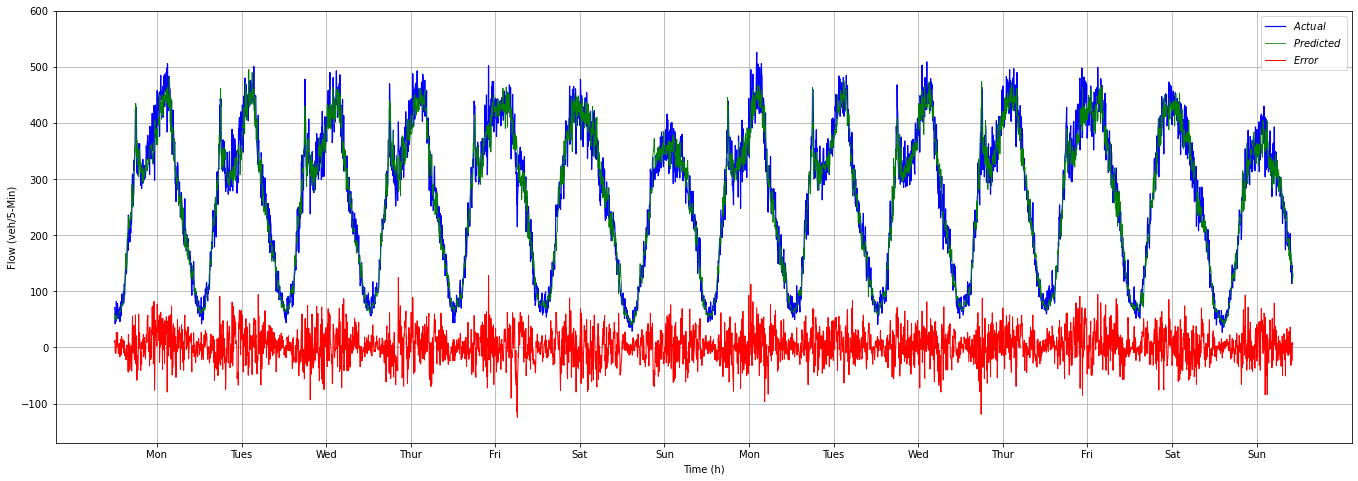

In [80]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(18,6))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(yv30, lw=1.2, label=r'$Actual$', color='blue')
axes.plot(test_predictions30, lw=0.8, label=r'$Predicted$', color='green')
axes.plot((yv30-test_predictions30), lw=1, label=r'$Error$', color='red')

#axes.set_xlim(0,24)
axes.set_ylim(-170,600)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([144 + i for i in range(0, 4032, 288)])
axes.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']*2)

plt.show()

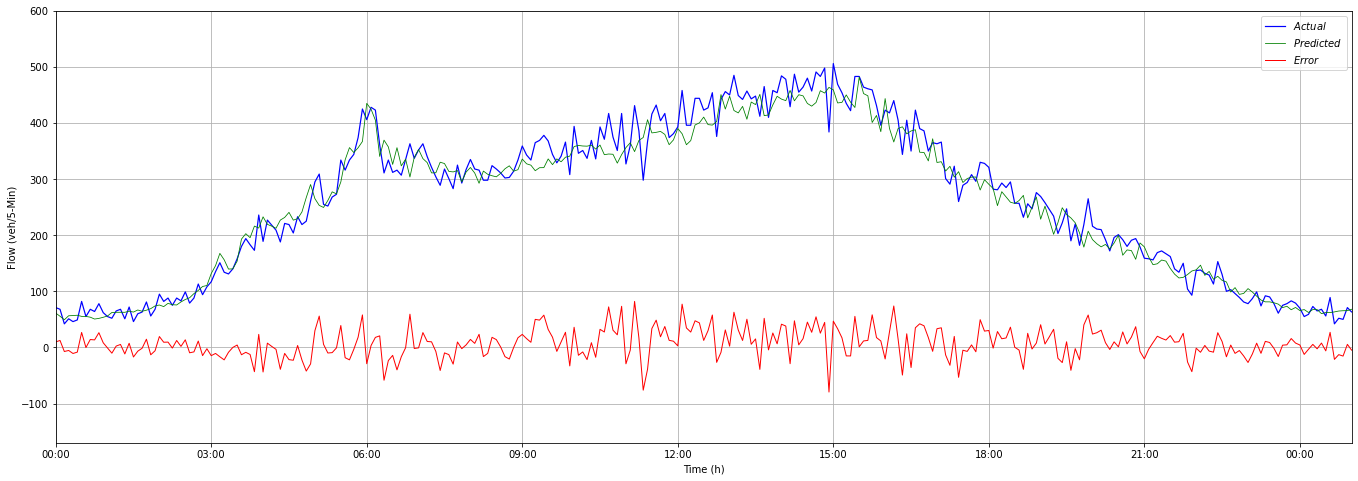

In [81]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(18,6))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(yv30, lw=1.2, label=r'$Actual$', color='blue')
axes.plot(test_predictions30, lw=0.8, label=r'$Predicted$', color='green')
axes.plot((yv30-test_predictions30), lw=1, label=r'$Error$', color='red')

axes.set_xlim(0,300)
axes.set_ylim(-170,600)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.show()

# 60 mins ahead

In [82]:
def build_model_60(hp):
    # Inputs
    channel_Wide = keras.layers.Input(shape=Wide_train_60.shape[1:], name="WideInput")
    channel_Deep = keras.layers.Input(shape=(None, n_steps, n_features, n_channels), name="DeepInput")
    
    # Wide Model
    Wide_60 = keras.layers.Dense(
        units=hp.Int("units_NN", min_value=10, max_value=100, step=1), activation="relu"
    )(channel_Wide)
    
    # Deep Model
    # CNN 
    CNN_60 = keras.layers.TimeDistributed(
        keras.layers.Conv2D(filters=hp.Int("filters", min_value=32, max_value=512, step=32),
                            kernel_size=hp.Choice("kernel_size", [2, 3]), activation='relu'))(channel_Deep)
    flatten_60 = keras.layers.TimeDistributed(keras.layers.Flatten())(CNN_60)
    # LSTM          
    LSTM_60 = keras.layers.LSTM(units=hp.Int("units_LSTM", min_value=1, max_value=100, step=1), 
                                activation='relu')(flatten_60)
    
    # Concatenation 
    concat = keras.layers.concatenate([Wide_60, LSTM_60])
    
    # Output
    output = keras.layers.Dense(1, name= "output")(concat)
    
    # Model
    model_60 = keras.Model(inputs=[channel_Wide,channel_Deep], outputs=[output])

    # Compile
    model_60.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])), 
        loss='mse',metrics=['MeanAbsoluteError','RootMeanSquaredError','MeanAbsolutePercentageError'])
                    
    return model_60

In [83]:
tuner60 = RandomSearch(
    build_model_60,
    objective="val_loss",
    max_trials=60,
    executions_per_trial=5,
    overwrite=False,
    directory=os.path.normpath('C:/Runs'),
    project_name="7d-CNN-LSTM-60",
)

INFO:tensorflow:Reloading Oracle from existing project C:\Runs\7d-CNN-LSTM-60\oracle.json
INFO:tensorflow:Reloading Tuner from C:\Runs\7d-CNN-LSTM-60\tuner0.json


In [84]:
tuner60.search_space_summary()

Search space summary
Default search space size: 5
units_NN (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 1, 'sampling': None}
filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
units_LSTM (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 100, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [85]:
tuner60.search((Wt60,Xt60), yt60, epochs=200,
            validation_split = val_percent,
            callbacks=[early_stop],
            verbose=2)

INFO:tensorflow:Oracle triggered exit


In [86]:
tuner60.results_summary(1)

Results summary
Results in C:\Runs\7d-CNN-LSTM-60
Showing 1 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units_NN: 91
filters: 320
kernel_size: 2
units_LSTM: 100
learning_rate: 0.0001
Score: 0.002269269432872534


### Best model

In [87]:
best_hp60 = tuner60.get_best_hyperparameters()[0]
model60 = tuner60.hypermodel.build(best_hp60)

In [88]:
scaler_filename = "Best_HP/7d-ConvLSTM-60"
joblib.dump(best_hp60, scaler_filename) 

['Best_HP/7d-ConvLSTM-60']

In [89]:
model60.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
DeepInput (InputLayer)          [(None, None, 5, 7,  0                                            
__________________________________________________________________________________________________
time_distributed (TimeDistribut (None, None, 4, 6, 3 1600        DeepInput[0][0]                  
__________________________________________________________________________________________________
WideInput (InputLayer)          [(None, 14)]         0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, None, 7680)   0           time_distributed[0][0]           
_______________________________________________________________________________________

In [90]:
#model60.fit((Wt60,Xt60), yt60, 
#            epochs = 200, 
#            callbacks = [stop],
#            verbose = 1
#            )

In [91]:
#model60.save("my_dir/7d-CNN-LSTM-60")

In [92]:
#metrics60 = pd.DataFrame(model60.history.history)

In [93]:
#metrics60[['loss']].plot()

In [94]:
MSE60  = []
MAE60  = []
RMSE60 = []
MAPE60 = []

for i in range(100):
    print(f"run: {i+1}")
    model60.fit((Wt60,Xt60), yt60, 
            epochs = 200, validation_split = val_percent,
            callbacks = [stop],
            verbose = 1
            )
    
    test_predictions60 = model60.predict((Wv60,Xv60))
    
    yv60 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
    yv60 = yv60[26:,4]

    df = Test.drop(Test.head(26).index)
    df.reset_index(inplace = True)
    df = df.drop(columns=['index','Timestamp'])
    df['f5'] = pd.Series(test_predictions60.flatten())

    test_predictions60 = scaler.inverse_transform(df)

    test_predictions60 = test_predictions60[:,4]
    
    MSE60.append(mean_squared_error(yv60,test_predictions60))

    MAE60.append(mean_absolute_error(yv60,test_predictions60))

    RMSE60.append(np.sqrt(mean_squared_error(yv60,test_predictions60)))

    MAPE60.append(mean_absolute_percentage_error(yv60,test_predictions60)*100)

    
    current_mse = mean_squared_error(yv60,test_predictions60)
    if all(i > current_mse for i in MSE60):
        model60.save("my_dir/7d-CNN-LSTM-60")

eval60 = [mean(MSE60), mean(MAE60), mean(RMSE60), mean(MAPE60)]
std60 = [stdev(MSE60), stdev(MAE60), stdev(RMSE60), stdev(MAPE60)]
print(eval60)

run: 1
Epoch 1/200
846/846 [==============================] - 51s 60ms/step - loss: 0.0035 - mean_absolute_error: 0.0428 - root_mean_squared_error: 0.0592 - mean_absolute_percentage_error: 4214.0654 - val_loss: 0.0028 - val_mean_absolute_error: 0.0388 - val_root_mean_squared_error: 0.0525 - val_mean_absolute_percentage_error: 11.4020
Epoch 2/200
846/846 [==============================] - 51s 60ms/step - loss: 0.0028 - mean_absolute_error: 0.0384 - root_mean_squared_error: 0.0532 - mean_absolute_percentage_error: 3300.5051 - val_loss: 0.0027 - val_mean_absolute_error: 0.0385 - val_root_mean_squared_error: 0.0518 - val_mean_absolute_percentage_error: 11.1353
Epoch 3/200
846/846 [==============================] - 50s 60ms/step - loss: 0.0027 - mean_absolute_error: 0.0379 - root_mean_squared_error: 0.0523 - mean_absolute_percentage_error: 3443.4155 - val_loss: 0.0026 - val_mean_absolute_error: 0.0383 - val_root_mean_squared_error: 0.0511 - val_mean_absolute_percentage_error: 11.0825
Epoch 

Epoch 2/200
846/846 [==============================] - 64s 75ms/step - loss: 0.0025 - mean_absolute_error: 0.0365 - root_mean_squared_error: 0.0500 - mean_absolute_percentage_error: 3376.0896 - val_loss: 0.0025 - val_mean_absolute_error: 0.0376 - val_root_mean_squared_error: 0.0495 - val_mean_absolute_percentage_error: 10.9391
Epoch 3/200
846/846 [==============================] - 63s 75ms/step - loss: 0.0025 - mean_absolute_error: 0.0364 - root_mean_squared_error: 0.0498 - mean_absolute_percentage_error: 3379.6240 - val_loss: 0.0024 - val_mean_absolute_error: 0.0369 - val_root_mean_squared_error: 0.0489 - val_mean_absolute_percentage_error: 10.9279
Epoch 4/200
846/846 [==============================] - 63s 75ms/step - loss: 0.0025 - mean_absolute_error: 0.0363 - root_mean_squared_error: 0.0497 - mean_absolute_percentage_error: 3531.5728 - val_loss: 0.0025 - val_mean_absolute_error: 0.0381 - val_root_mean_squared_error: 0.0501 - val_mean_absolute_percentage_error: 10.9593
Epoch 5/200
8

846/846 [==============================] - 63s 74ms/step - loss: 0.0024 - mean_absolute_error: 0.0357 - root_mean_squared_error: 0.0486 - mean_absolute_percentage_error: 3290.3252 - val_loss: 0.0025 - val_mean_absolute_error: 0.0370 - val_root_mean_squared_error: 0.0496 - val_mean_absolute_percentage_error: 10.9753 2s - loss: 0.0024 - mean_absolute_error: 0.0357 - root_mean_squared_error: 0.0487 - mean_absolute_pe - ETA: 1s - loss: 0.0024 - mean_absolute_error: 0.0357 - root_mean_squared_error: 0.0486 - mean_absolute_percentag
Epoch 2/200
846/846 [==============================] - 62s 73ms/step - loss: 0.0024 - mean_absolute_error: 0.0357 - root_mean_squared_error: 0.0486 - mean_absolute_percentage_error: 3201.2019 - val_loss: 0.0025 - val_mean_absolute_error: 0.0370 - val_root_mean_squared_error: 0.0496 - val_mean_absolute_percentage_error: 10.9356
Epoch 3/200
846/846 [==============================] - 63s 74ms/step - loss: 0.0024 - mean_absolute_error: 0.0356 - root_mean_squared_erro

846/846 [==============================] - 60s 71ms/step - loss: 0.0022 - mean_absolute_error: 0.0349 - root_mean_squared_error: 0.0473 - mean_absolute_percentage_error: 2948.8445 - val_loss: 0.0028 - val_mean_absolute_error: 0.0389 - val_root_mean_squared_error: 0.0530 - val_mean_absolute_percentage_error: 11.3620
Epoch 7/200
846/846 [==============================] - 61s 72ms/step - loss: 0.0022 - mean_absolute_error: 0.0349 - root_mean_squared_error: 0.0473 - mean_absolute_percentage_error: 3601.4011 - val_loss: 0.0028 - val_mean_absolute_error: 0.0389 - val_root_mean_squared_error: 0.0531 - val_mean_absolute_percentage_error: 11.5620
Epoch 8/200
846/846 [==============================] - 61s 72ms/step - loss: 0.0022 - mean_absolute_error: 0.0349 - root_mean_squared_error: 0.0473 - mean_absolute_percentage_error: 3328.9971 - val_loss: 0.0029 - val_mean_absolute_error: 0.0400 - val_root_mean_squared_error: 0.0541 - val_mean_absolute_percentage_error: 11.4007
run: 17
Epoch 1/200
846/8

846/846 [==============================] - 61s 72ms/step - loss: 0.0021 - mean_absolute_error: 0.0340 - root_mean_squared_error: 0.0461 - mean_absolute_percentage_error: 3357.8525 - val_loss: 0.0029 - val_mean_absolute_error: 0.0393 - val_root_mean_squared_error: 0.0541 - val_mean_absolute_percentage_error: 11.6107e_error: 337
Epoch 5/200
846/846 [==============================] - 59s 69ms/step - loss: 0.0021 - mean_absolute_error: 0.0340 - root_mean_squared_error: 0.0459 - mean_absolute_percentage_error: 3203.8284 - val_loss: 0.0030 - val_mean_absolute_error: 0.0396 - val_root_mean_squared_error: 0.0543 - val_mean_absolute_percentage_error: 11.7008
Epoch 6/200
846/846 [==============================] - 60s 71ms/step - loss: 0.0021 - mean_absolute_error: 0.0340 - root_mean_squared_error: 0.0459 - mean_absolute_percentage_error: 3335.8340 - val_loss: 0.0032 - val_mean_absolute_error: 0.0402 - val_root_mean_squared_error: 0.0563 - val_mean_absolute_percentage_error: 12.0181
Epoch 7/200
8

846/846 [==============================] - 58s 68ms/step - loss: 0.0019 - mean_absolute_error: 0.0327 - root_mean_squared_error: 0.0440 - mean_absolute_percentage_error: 3081.9570 - val_loss: 0.0034 - val_mean_absolute_error: 0.0407 - val_root_mean_squared_error: 0.0581 - val_mean_absolute_percentage_error: 12.3048
Epoch 6/200
846/846 [==============================] - 60s 71ms/step - loss: 0.0019 - mean_absolute_error: 0.0325 - root_mean_squared_error: 0.0438 - mean_absolute_percentage_error: 3230.5852 - val_loss: 0.0033 - val_mean_absolute_error: 0.0410 - val_root_mean_squared_error: 0.0576 - val_mean_absolute_percentage_error: 12.1031
run: 29
Epoch 1/200
846/846 [==============================] - 59s 70ms/step - loss: 0.0020 - mean_absolute_error: 0.0328 - root_mean_squared_error: 0.0443 - mean_absolute_percentage_error: 3400.7568 - val_loss: 0.0034 - val_mean_absolute_error: 0.0406 - val_root_mean_squared_error: 0.0581 - val_mean_absolute_percentage_error: 12.2749
Epoch 2/200
846/8

846/846 [==============================] - 60s 71ms/step - loss: 0.0018 - mean_absolute_error: 0.0313 - root_mean_squared_error: 0.0422 - mean_absolute_percentage_error: 3800.1809 - val_loss: 0.0035 - val_mean_absolute_error: 0.0416 - val_root_mean_squared_error: 0.0594 - val_mean_absolute_percentage_error: 12.5934
Epoch 3/200
846/846 [==============================] - 59s 69ms/step - loss: 0.0018 - mean_absolute_error: 0.0314 - root_mean_squared_error: 0.0423 - mean_absolute_percentage_error: 3590.0239 - val_loss: 0.0038 - val_mean_absolute_error: 0.0431 - val_root_mean_squared_error: 0.0618 - val_mean_absolute_percentage_error: 13.2796
Epoch 4/200
846/846 [==============================] - 60s 70ms/step - loss: 0.0017 - mean_absolute_error: 0.0311 - root_mean_squared_error: 0.0418 - mean_absolute_percentage_error: 3352.6323 - val_loss: 0.0035 - val_mean_absolute_error: 0.0419 - val_root_mean_squared_error: 0.0594 - val_mean_absolute_percentage_error: 12.5461
Epoch 6/200
846/846 [====

846/846 [==============================] - 60s 71ms/step - loss: 0.0015 - mean_absolute_error: 0.0290 - root_mean_squared_error: 0.0392 - mean_absolute_percentage_error: 3532.1855 - val_loss: 0.0037 - val_mean_absolute_error: 0.0431 - val_root_mean_squared_error: 0.0612 - val_mean_absolute_percentage_error: 12.9220
run: 41
Epoch 1/200
846/846 [==============================] - 62s 73ms/step - loss: 0.0016 - mean_absolute_error: 0.0295 - root_mean_squared_error: 0.0396 - mean_absolute_percentage_error: 3477.1497 - val_loss: 0.0039 - val_mean_absolute_error: 0.0437 - val_root_mean_squared_error: 0.0625 - val_mean_absolute_percentage_error: 13.1464a
Epoch 2/200
846/846 [==============================] - 59s 70ms/step - loss: 0.0016 - mean_absolute_error: 0.0293 - root_mean_squared_error: 0.0395 - mean_absolute_percentage_error: 3378.0464 - val_loss: 0.0039 - val_mean_absolute_error: 0.0438 - val_root_mean_squared_error: 0.0626 - val_mean_absolute_percentage_error: 13.1304
Epoch 3/200
846/

846/846 [==============================] - 58s 69ms/step - loss: 0.0013 - mean_absolute_error: 0.0271 - root_mean_squared_error: 0.0365 - mean_absolute_percentage_error: 3694.9849 - val_loss: 0.0042 - val_mean_absolute_error: 0.0450 - val_root_mean_squared_error: 0.0647 - val_mean_absolute_percentage_error: 13.68000.0013 - mean_absolute_error: 0.0270 - root_mean_squared_error: 0.0365 - mean_absolu
Epoch 5/200
846/846 [==============================] - 59s 70ms/step - loss: 0.0013 - mean_absolute_error: 0.0270 - root_mean_squared_error: 0.0364 - mean_absolute_percentage_error: 3473.2939 - val_loss: 0.0042 - val_mean_absolute_error: 0.0451 - val_root_mean_squared_error: 0.0645 - val_mean_absolute_percentage_error: 13.5681
Epoch 6/200
846/846 [==============================] - 59s 70ms/step - loss: 0.0013 - mean_absolute_error: 0.0269 - root_mean_squared_error: 0.0364 - mean_absolute_percentage_error: 3588.8503 - val_loss: 0.0040 - val_mean_absolute_error: 0.0449 - val_root_mean_squared_e

846/846 [==============================] - 58s 69ms/step - loss: 0.0011 - mean_absolute_error: 0.0250 - root_mean_squared_error: 0.0339 - mean_absolute_percentage_error: 3957.0000 - val_loss: 0.0045 - val_mean_absolute_error: 0.0463 - val_root_mean_squared_error: 0.0669 - val_mean_absolute_percentage_error: 14.0831
run: 53
Epoch 1/200
846/846 [==============================] - 60s 71ms/step - loss: 0.0012 - mean_absolute_error: 0.0253 - root_mean_squared_error: 0.0342 - mean_absolute_percentage_error: 3654.0835 - val_loss: 0.0043 - val_mean_absolute_error: 0.0460 - val_root_mean_squared_error: 0.0656 - val_mean_absolute_percentage_error: 13.9245
Epoch 2/200
846/846 [==============================] - 59s 70ms/step - loss: 0.0012 - mean_absolute_error: 0.0252 - root_mean_squared_error: 0.0341 - mean_absolute_percentage_error: 3557.2510 - val_loss: 0.0041 - val_mean_absolute_error: 0.0457 - val_root_mean_squared_error: 0.0640 - val_mean_absolute_percentage_error: 13.6782
Epoch 3/200
846/8

846/846 [==============================] - 60s 70ms/step - loss: 0.0010 - mean_absolute_error: 0.0238 - root_mean_squared_error: 0.0321 - mean_absolute_percentage_error: 3047.0549 - val_loss: 0.0046 - val_mean_absolute_error: 0.0476 - val_root_mean_squared_error: 0.0677 - val_mean_absolute_percentage_error: 14.3637
Epoch 4/200
846/846 [==============================] - 59s 70ms/step - loss: 0.0010 - mean_absolute_error: 0.0238 - root_mean_squared_error: 0.0321 - mean_absolute_percentage_error: 3317.8584 - val_loss: 0.0045 - val_mean_absolute_error: 0.0474 - val_root_mean_squared_error: 0.0671 - val_mean_absolute_percentage_error: 14.2717 0.0322 - mean_abso
Epoch 5/200
846/846 [==============================] - 61s 72ms/step - loss: 0.0010 - mean_absolute_error: 0.0235 - root_mean_squared_error: 0.0318 - mean_absolute_percentage_error: 3484.9688 - val_loss: 0.0047 - val_mean_absolute_error: 0.0481 - val_root_mean_squared_error: 0.0684 - val_mean_absolute_percentage_error: 14.5702: 43s -

846/846 [==============================] - 61s 72ms/step - loss: 8.7015e-04 - mean_absolute_error: 0.0218 - root_mean_squared_error: 0.0295 - mean_absolute_percentage_error: 3369.1763 - val_loss: 0.0048 - val_mean_absolute_error: 0.0488 - val_root_mean_squared_error: 0.0690 - val_mean_absolute_percentage_error: 14.6300
Epoch 2/200
846/846 [==============================] - 62s 73ms/step - loss: 8.6624e-04 - mean_absolute_error: 0.0217 - root_mean_squared_error: 0.0294 - mean_absolute_percentage_error: 2838.0449 - val_loss: 0.0048 - val_mean_absolute_error: 0.0490 - val_root_mean_squared_error: 0.0693 - val_mean_absolute_percentage_error: 14.7479
Epoch 3/200
846/846 [==============================] - 60s 71ms/step - loss: 8.5001e-04 - mean_absolute_error: 0.0215 - root_mean_squared_error: 0.0292 - mean_absolute_percentage_error: 3667.9878 - val_loss: 0.0049 - val_mean_absolute_error: 0.0494 - val_root_mean_squared_error: 0.0697 - val_mean_absolute_percentage_error: 14.7430
Epoch 5/200
8

846/846 [==============================] - 58s 68ms/step - loss: 6.7611e-04 - mean_absolute_error: 0.0191 - root_mean_squared_error: 0.0260 - mean_absolute_percentage_error: 2865.2556 - val_loss: 0.0048 - val_mean_absolute_error: 0.0498 - val_root_mean_squared_error: 0.0691 - val_mean_absolute_percentage_error: 14.8768
Epoch 15/200
846/846 [==============================] - 58s 68ms/step - loss: 6.8250e-04 - mean_absolute_error: 0.0192 - root_mean_squared_error: 0.0261 - mean_absolute_percentage_error: 2944.1970 - val_loss: 0.0050 - val_mean_absolute_error: 0.0505 - val_root_mean_squared_error: 0.0704 - val_mean_absolute_percentage_error: 14.9952
Epoch 16/200
846/846 [==============================] - 59s 70ms/step - loss: 6.7082e-04 - mean_absolute_error: 0.0190 - root_mean_squared_error: 0.0259 - mean_absolute_percentage_error: 2479.8220 - val_loss: 0.0053 - val_mean_absolute_error: 0.0524 - val_root_mean_squared_error: 0.0731 - val_mean_absolute_percentage_error: 15.5946
Epoch 17/20

846/846 [==============================] - 58s 68ms/step - loss: 5.4381e-04 - mean_absolute_error: 0.0172 - root_mean_squared_error: 0.0233 - mean_absolute_percentage_error: 2482.9807 - val_loss: 0.0051 - val_mean_absolute_error: 0.0520 - val_root_mean_squared_error: 0.0713 - val_mean_absolute_percentage_error: 15.3469e-04 - mean - ETA: 1s - loss: 5.4317e-04 - mean_absolute_error: 0.0172 - root_mean_squared_error: 0.0233 - mean_absolute_percentag
run: 77
Epoch 1/200
846/846 [==============================] - 56s 67ms/step - loss: 5.6677e-04 - mean_absolute_error: 0.0176 - root_mean_squared_error: 0.0238 - mean_absolute_percentage_error: 2845.9951 - val_loss: 0.0051 - val_mean_absolute_error: 0.0516 - val_root_mean_squared_error: 0.0713 - val_mean_absolute_percentage_error: 15.3185
Epoch 2/200
846/846 [==============================] - 60s 70ms/step - loss: 5.5723e-04 - mean_absolute_error: 0.0174 - root_mean_squared_error: 0.0236 - mean_absolute_percentage_error: 2360.1355 - val_loss: 

846/846 [==============================] - 60s 70ms/step - loss: 4.5885e-04 - mean_absolute_error: 0.0158 - root_mean_squared_error: 0.0214 - mean_absolute_percentage_error: 2314.6804 - val_loss: 0.0053 - val_mean_absolute_error: 0.0532 - val_root_mean_squared_error: 0.0730 - val_mean_absolute_percentage_error: 15.8070
Epoch 3/200
846/846 [==============================] - 59s 70ms/step - loss: 4.5445e-04 - mean_absolute_error: 0.0157 - root_mean_squared_error: 0.0213 - mean_absolute_percentage_error: 1770.9948 - val_loss: 0.0054 - val_mean_absolute_error: 0.0527 - val_root_mean_squared_error: 0.0732 - val_mean_absolute_percentage_error: 15.7581
Epoch 4/200
846/846 [==============================] - 59s 69ms/step - loss: 4.4095e-04 - mean_absolute_error: 0.0155 - root_mean_squared_error: 0.0210 - mean_absolute_percentage_error: 2090.3757 - val_loss: 0.0052 - val_mean_absolute_error: 0.0525 - val_root_mean_squared_error: 0.0723 - val_mean_absolute_percentage_error: 15.5933
Epoch 6/200
8

846/846 [==============================] - 62s 73ms/step - loss: 3.7421e-04 - mean_absolute_error: 0.0143 - root_mean_squared_error: 0.0193 - mean_absolute_percentage_error: 1878.3831 - val_loss: 0.0054 - val_mean_absolute_error: 0.0536 - val_root_mean_squared_error: 0.0734 - val_mean_absolute_percentage_error: 15.7702
Epoch 2/200
846/846 [==============================] - 58s 68ms/step - loss: 3.6273e-04 - mean_absolute_error: 0.0141 - root_mean_squared_error: 0.0190 - mean_absolute_percentage_error: 1833.9922 - val_loss: 0.0055 - val_mean_absolute_error: 0.0540 - val_root_mean_squared_error: 0.0741 - val_mean_absolute_percentage_error: 15.8943
Epoch 4/200
846/846 [==============================] - 61s 72ms/step - loss: 3.5782e-04 - mean_absolute_error: 0.0140 - root_mean_squared_error: 0.0189 - mean_absolute_percentage_error: 1300.8311 - val_loss: 0.0054 - val_mean_absolute_error: 0.0534 - val_root_mean_squared_error: 0.0733 - val_mean_absolute_percentage_error: 15.8457
Epoch 5/200
8

846/846 [==============================] - 59s 70ms/step - loss: 2.9980e-04 - mean_absolute_error: 0.0129 - root_mean_squared_error: 0.0173 - mean_absolute_percentage_error: 2407.1086 - val_loss: 0.0055 - val_mean_absolute_error: 0.0539 - val_root_mean_squared_error: 0.0739 - val_mean_absolute_percentage_error: 16.0072
run: 96
Epoch 1/200
846/846 [==============================] - 61s 72ms/step - loss: 3.1010e-04 - mean_absolute_error: 0.0130 - root_mean_squared_error: 0.0176 - mean_absolute_percentage_error: 2433.0684 - val_loss: 0.0055 - val_mean_absolute_error: 0.0539 - val_root_mean_squared_error: 0.0741 - val_mean_absolute_percentage_error: 15.9935
Epoch 2/200
846/846 [==============================] - 61s 72ms/step - loss: 3.1215e-04 - mean_absolute_error: 0.0131 - root_mean_squared_error: 0.0177 - mean_absolute_percentage_error: 1705.1777 - val_loss: 0.0056 - val_mean_absolute_error: 0.0547 - val_root_mean_squared_error: 0.0750 - val_mean_absolute_percentage_error: 16.1140
Epoch

In [95]:
model60 = keras.models.load_model("my_dir/7d-CNN-LSTM-60")

In [114]:
runs = {'MSE': MSE60, 'MAE': MAE60, 'RMSE': RMSE60, 'MAPE': MAPE60}
table60 = pd.DataFrame(data=runs)
table60.to_csv("Results/Runs/7d-CNN-LSTM-60")

In [115]:
pd.read_csv("Results/Runs/7d-CNN-LSTM-60", index_col=0)

,MSE,MAE,RMSE,MAPE
0,672.202830,20.035056,25.926875,9.001983
1,679.796246,20.173189,26.072903,8.994886
2,679.279347,20.114169,26.062988,9.072313
3,690.001990,20.277523,26.267889,9.019655
4,685.587603,20.190781,26.183728,8.830879
...,...,...,...,...
95,1362.036237,27.836812,36.905775,11.683915
96,1338.902522,27.663542,36.591017,11.688902
97,1367.358036,28.034669,36.977805,12.004864
98,1355.899828,27.764385,36.822545,11.832927


### Evaluation on inverse_transform

In [96]:
test_predictions60 = model60.predict((Wv60,Xv60))

yv60 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
yv60 = yv60[26:,4]

df = Test.drop(Test.head(26).index)
df.reset_index(inplace = True)
df = df.drop(columns=['index','Timestamp'])
df['f5'] = pd.Series(test_predictions60.flatten())

test_predictions60 = scaler.inverse_transform(df)

test_predictions60 = test_predictions60[:,4]

#MSE60 = mean_squared_error(yv60,test_predictions60)

#MAE60 = mean_absolute_error(yv60,test_predictions60)

#RMSE60 = np.sqrt(MSE60)

#MAPE60 = mean_absolute_percentage_error(yv60,test_predictions60)*100

#eval60 = [MSE60, MAE60, RMSE60, MAPE60]
#print(eval60)

In [97]:
RA10 = ra.RA_10(np.asarray(yv60), np.asarray(test_predictions60))
RA15 = ra.RA_15(np.asarray(yv60), np.asarray(test_predictions60))
RA20 = ra.RA_20(np.asarray(yv60), np.asarray(test_predictions60))

res60 = [RA10, RA15, RA20]
print(res60)

[60.03494757863205, 77.85821268097854, 88.01797304043934]


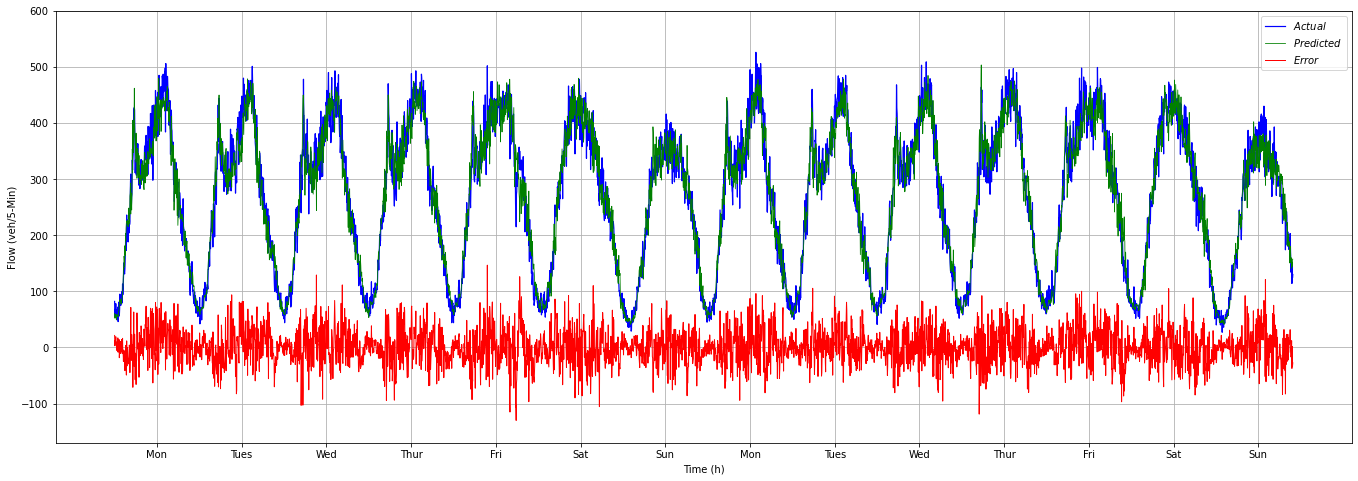

In [98]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(18,6))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(yv60, lw=1.2, label=r'$Actual$', color='blue')
axes.plot(test_predictions60, lw=0.8, label=r'$Predicted$', color='green')
axes.plot((yv60-test_predictions60), lw=1, label=r'$Error$', color='red')

#axes.set_xlim(0,24)
axes.set_ylim(-170,600)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([144 + i for i in range(0, 4032, 288)])
axes.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']*2)

plt.show()

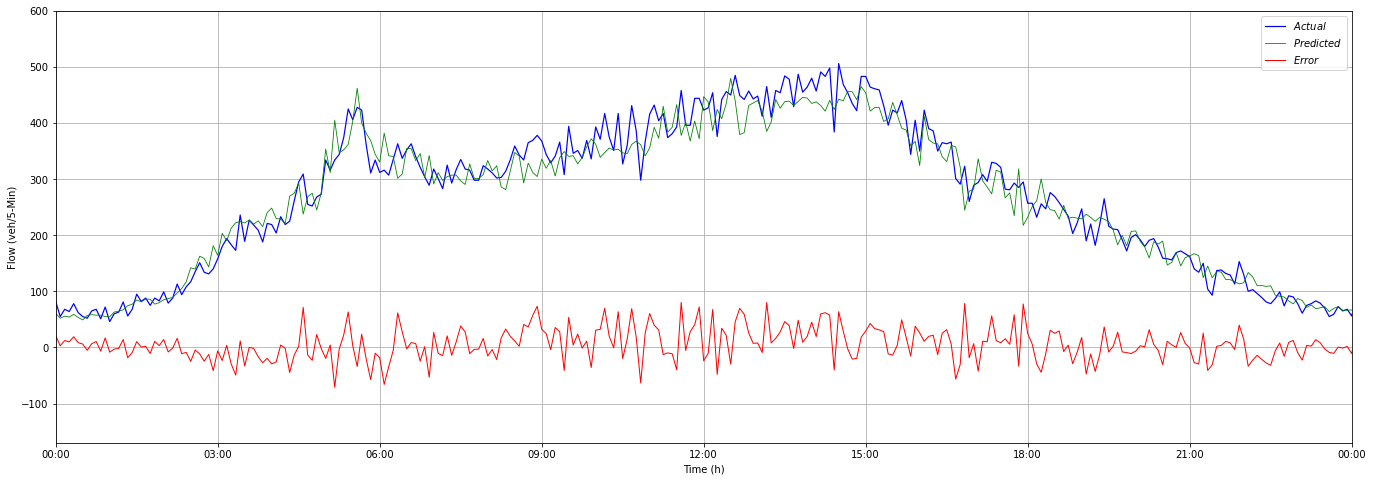

In [99]:
# Create Figure (empty canvas)
fig = plt.figure(figsize=(18,6))

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(yv60, lw=1.2, label=r'$Actual$', color='blue')
axes.plot(test_predictions60, lw=0.8, label=r'$Predicted$', color='green')
axes.plot((yv60-test_predictions60), lw=1, label=r'$Error$', color='red')

axes.set_xlim(0,24)
axes.set_ylim(-170,600)
axes.set_xlabel('Time (h)')
axes.set_ylabel('Flow (veh/5-Min)')

axes.legend(loc=1)
axes.grid()

axes.set_xticks([0, 36, 72, 108, 144, 180, 216, 252, 288])
axes.set_xticklabels(['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00','00:00'])

plt.show()

# RESULTS

## General results

In [100]:
l = ['MSE','MAE','RMSE','MAPE','Horizon']

In [101]:
eval5.append(5)
eval15.append(15)
eval30.append(30)
eval60.append(60)

In [116]:
df = pd.DataFrame(np.array([eval5,eval15,eval30,eval60]),columns=l)
df.set_index('Horizon')

,MSE,MAE,RMSE,MAPE
Horizon,,,,
5.0,575.457921,18.124444,23.925517,7.859445
15.0,792.665740,21.474121,28.044062,9.370935
30.0,912.908850,22.942814,30.018552,9.850006
60.0,951.840854,23.325971,30.609093,10.068173


## Relative accuracy

In [103]:
m = ['10%','15%','20%','Horizon']

In [104]:
res5.append(5)
res15.append(15)
res30.append(30)
res60.append(60)

In [105]:
df1 = pd.DataFrame(np.array([res5,res15,res30,res60]),columns=m)
df1.set_index('Horizon')

,10%,15%,20%
Horizon,,,
5.0,72.193179,87.179487,94.224546
15.0,65.977584,82.615193,91.731009
30.0,65.029910,82.552343,91.500499
60.0,60.034948,77.858213,88.017973


## Save

In [106]:
x = np.array([eval5, eval15, eval30, eval60])
y = np.array([std5, std15, std30, std60])

In [107]:
np.savez("Results/7b", x=x , y=y)